In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset_path = "./archive/Databel - Data.csv"

In [3]:
data = pd.read_csv(dataset_path)
data.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

## A. Data Cleaning

In [5]:
data.isnull().sum()

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

In [6]:
data['Churn Category'].unique()

array([nan, 'Competitor', 'Other', 'Attitude', 'Dissatisfaction', 'Price'],
      dtype=object)

In [7]:
data['Churn Reason'].unique()

array([nan, 'Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Attitude of support person', 'Network reliability', "Don't know",
       'Service dissatisfaction', 'Product dissatisfaction',
       'Poor expertise of online support', 'Price too high',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Competitor offered more data',
       'Attitude of service provider', 'Poor expertise of phone support',
       'Extra data charges', 'Deceased',
       'Lack of self-service on Website'], dtype=object)

In [8]:
data.fillna("Not Churned", inplace=True)

In [9]:
data.duplicated().any()

False

In [10]:
# Customer ID and phone number are not important
data.drop(columns=["Phone Number"], inplace=True)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account Length (in months),6687.0,32.337820,24.595689,1.0,9.0,29.0,55.00,77.0
Local Calls,6687.0,130.974129,121.893966,1.0,31.0,98.0,199.00,918.0
Local Mins,6687.0,322.752864,288.619931,4.0,76.9,250.5,498.05,1234.2
Intl Calls,6687.0,51.097524,103.592369,0.0,0.0,0.0,52.00,1120.0
Intl Mins,6687.0,130.070624,243.527828,0.0,0.0,0.0,140.40,1372.5
Extra International Charges,6687.0,33.641783,76.346828,0.0,0.0,0.0,16.40,585.8
Customer Service Calls,6687.0,0.915657,1.411484,0.0,0.0,0.0,2.00,5.0
Avg Monthly GB Download,6687.0,6.696276,7.454339,0.0,1.0,5.0,9.00,43.0
Extra Data Charges,6687.0,3.374458,12.565309,0.0,0.0,0.0,0.00,99.0
Age,6687.0,47.448632,16.969893,19.0,33.0,47.0,60.00,85.0


In [12]:
data.describe(include="object").T

,count,unique,top,freq
Customer ID,6687,6687,4444-BZPU,1
Churn Label,6687,2,No,4891
Intl Active,6687,2,No,4116
Intl Plan,6687,2,no,6036
Unlimited Data Plan,6687,2,Yes,4494
State,6687,51,WV,213
Gender,6687,3,Male,3379
Under 30,6687,2,No,5400
Senior,6687,2,No,5460
Group,6687,2,No,5166


### Numeric features insights
- On average, customers stay enrolled for 32 months. Most customers who are relatively new stay for 29 months.
- Local calls & locals minutes vary alot revealing no significant insights, so segmentation may be useful to seperate users into low usage vs high usage.
- International calls and minutes have a median value of 0, indicating a high possibility that more than 50% of users are not using international plans, which means we can focus on other features.
- Most customers never contact the customer service but the ones who call do so more than twice and are most likely not satisfied with the service.
- Data consumption reveals no significant informatio,n as on average customers use 7Gb with the median using 5Gb indicating no significant variance.
- Broad age range from 19 upto 85, with the average being 47. Segmentation could be applied to group customers and potentially reveal characteristics of age groups.
- On average, the majority of customers spend $31$ per month. The median, being $31$, reveals that 50% of customers spend above average, categorizing them as potential high-value customers and the remaining low-value customers. The same can be said about total charges.

### Categorical features insights
- 26.85% churn rate
- The majority have no active international plan, only a small percentage of 9.73% have international plans.
- The majority have an unlimited data plan, 67.2% of customers.
- The most common contract type is for month-to-month users who most likely use direct debit payment methods.
- Most customers have no protection plan, only 34.3% of them have it.
- Demographically speaking, 80.75% of customers are above 30.
- Only 18.34% of customers are seniors.
- The majority of customers are not enrolled in group plans.

## Churners vs Non-Churners Statistical Characteristics

In [13]:
data['Churn Label'] = data['Churn Label'].apply(lambda x:1 if(str(x).lower() == 'yes') else 0)

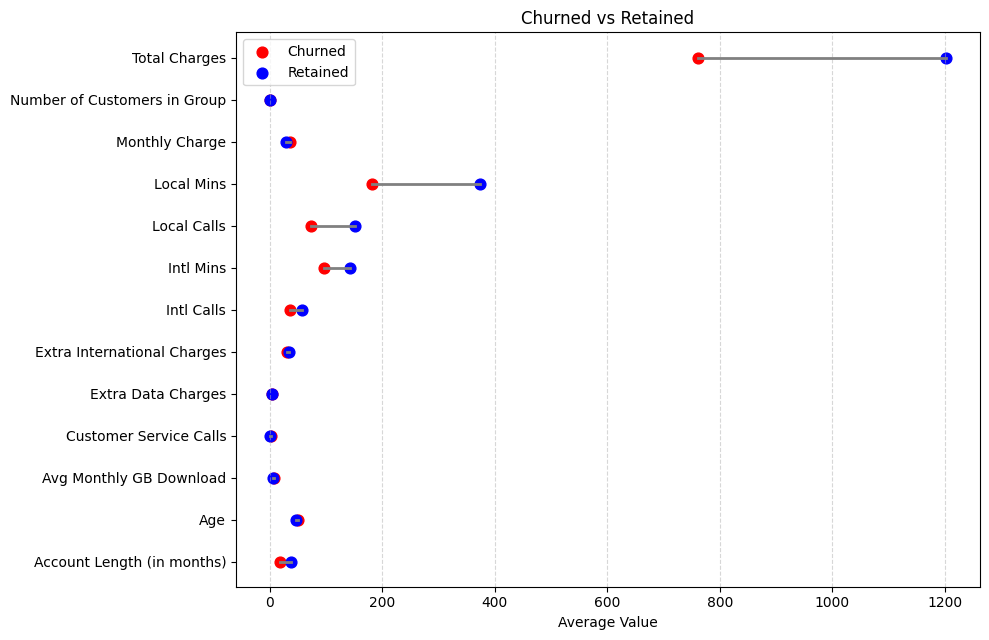

In [14]:
churned = data[data['Churn Label'] == 1]
retained = data[data['Churn Label'] == 0]

numeric_cols = data.select_dtypes(include='number').columns.difference(['Churn Label'])
num_means = pd.DataFrame({
    'Churned': churned[numeric_cols].mean(),
    'Retained': retained[numeric_cols].mean()
}).reset_index().rename(columns={'index': 'Feature'})

plt.figure(figsize=(10, len(num_means) * 0.5))
for i, row in num_means.iterrows():
    plt.plot([row['Churned'], row['Retained']], [i, i], color='gray', lw=2)
    plt.scatter(row['Churned'], i, color='red', label='Churned' if i == 0 else "", s=60)
    plt.scatter(row['Retained'], i, color='blue', label='Retained' if i == 0 else "", s=60)

plt.yticks(range(len(num_means)), num_means['Feature'])
plt.xlabel('Average Value')
plt.title('Churned vs Retained')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


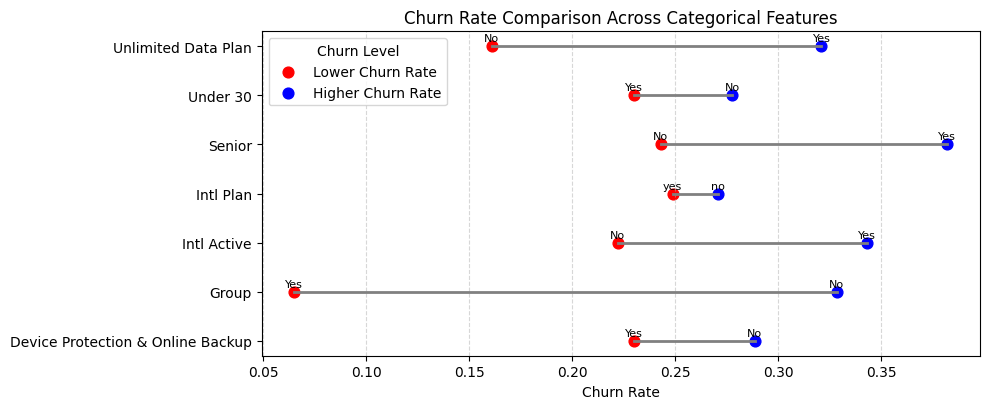

In [15]:
categorical_cols = data.select_dtypes(include='object').columns.difference(['Churn Label'])

# Recompute churn rates per category
categorical_churn_rates = []

for feature in categorical_cols:
    churn_summary = data.groupby(feature)['Churn Label'].mean().reset_index()
    churn_summary.columns = ['Category', 'Churn Rate']
    churn_summary['Feature'] = feature
    categorical_churn_rates.append(churn_summary)

# Combine into a single dataframe
cat_churn_df = pd.concat(categorical_churn_rates, ignore_index=True)

# Keep only binary categorical features (exactly 2 categories)
binary_cat_df = cat_churn_df.groupby('Feature').filter(lambda x: len(x) == 2)

# Pivot for dumbbell plotting
dumbbell_cat_df = binary_cat_df.pivot(index='Feature', columns='Category', values='Churn Rate')

# Plot updated dumbbell plot for categorical features
plt.figure(figsize=(10, len(dumbbell_cat_df) * 0.6))
for i, (idx, row) in enumerate(dumbbell_cat_df.iterrows()):
    values = row.sort_values()
    plt.plot([values.iloc[0], values.iloc[1]], [i, i], color='gray', lw=2)
    plt.scatter(values.iloc[0], i, color='red', label='Lower Churn Rate' if i == 0 else "", s=60)
    plt.scatter(values.iloc[1], i, color='blue', label='Higher Churn Rate' if i == 0 else "", s=60)
    plt.text(values.iloc[0], i + 0.1, values.index[0], ha='center', fontsize=8)
    plt.text(values.iloc[1], i + 0.1, values.index[1], ha='center', fontsize=8)

plt.yticks(range(len(dumbbell_cat_df)), dumbbell_cat_df.index)
plt.xlabel('Churn Rate')
plt.title('Churn Rate Comparison Across Categorical Features')
plt.legend(title='Churn Level')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


---

- Churners tend to have shorter account lengths, lower service usage, and significantly more customer service interactions, indicating dissatisfaction and early disengagement.
- They are more likely to be on month-to-month contracts, pay via manual methods, and lack group or bundled plans.
- In contrast, retained customers show higher stability, engagement, and lifetime value, confirming the behavioral and structural predictors of churn.







---

## B. Exploratoty Data Analysis (EDA)

In [16]:
numerical_vars = list(data.describe().keys())
categorical_vars = list(data.describe(include="object").keys())
print(f"Num_features: {numerical_vars}\n\nCat_features: {categorical_vars}")

Num_features: ['Churn Label', 'Account Length (in months)', 'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Extra International Charges', 'Customer Service Calls', 'Avg Monthly GB Download', 'Extra Data Charges', 'Age', 'Number of Customers in Group', 'Monthly Charge', 'Total Charges']

Cat_features: ['Customer ID', 'Intl Active', 'Intl Plan', 'Unlimited Data Plan', 'State', 'Gender', 'Under 30', 'Senior', 'Group', 'Device Protection & Online Backup', 'Contract Type', 'Payment Method', 'Churn Category', 'Churn Reason']


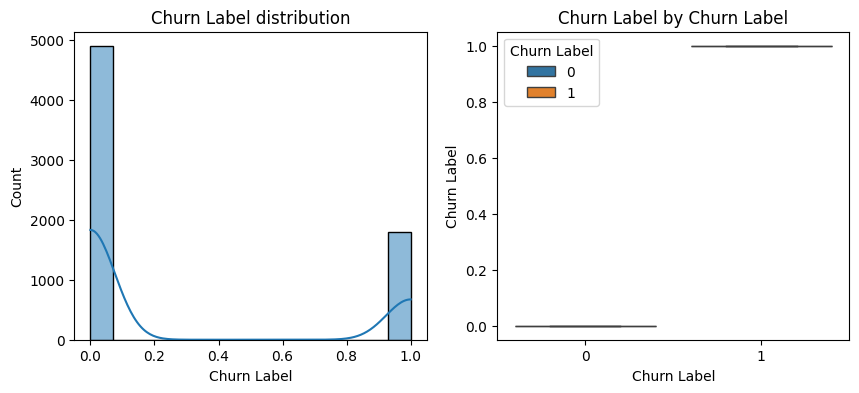

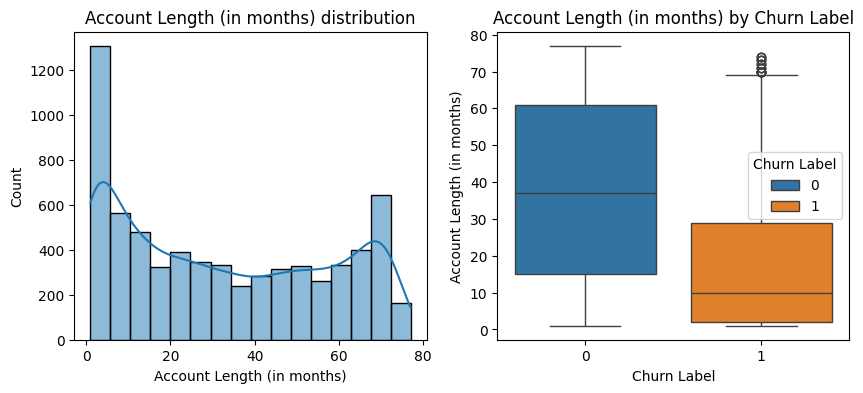

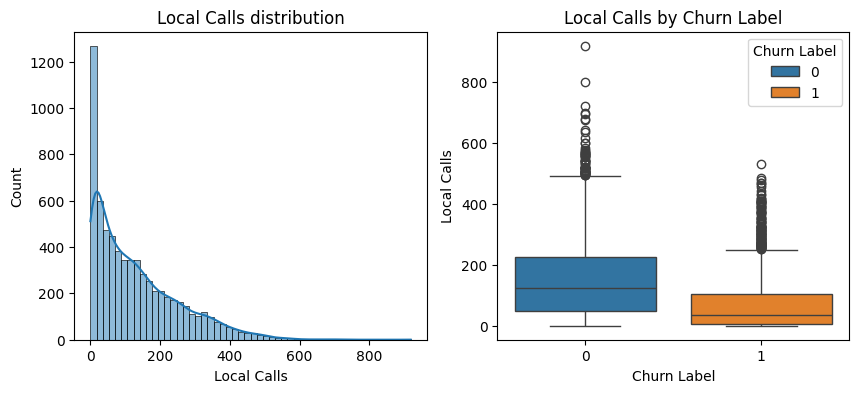

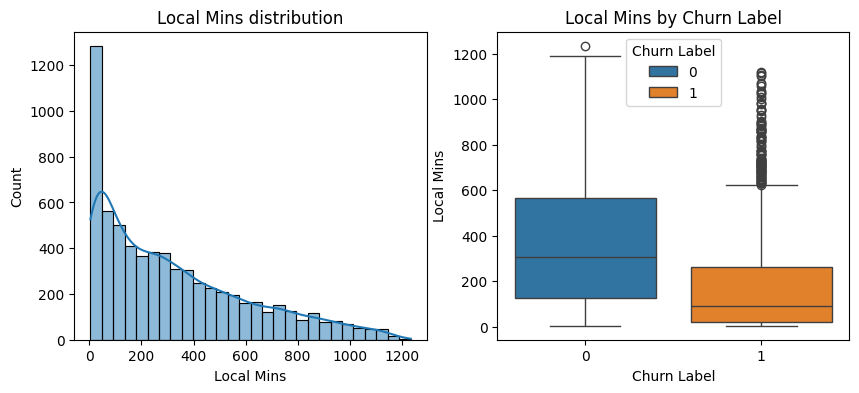

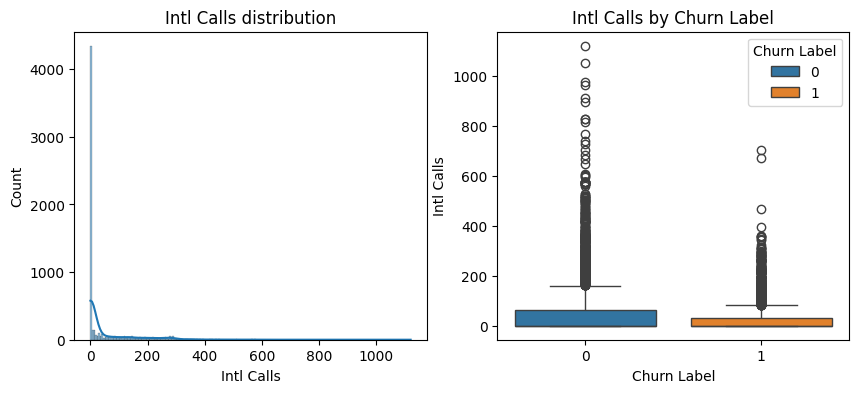

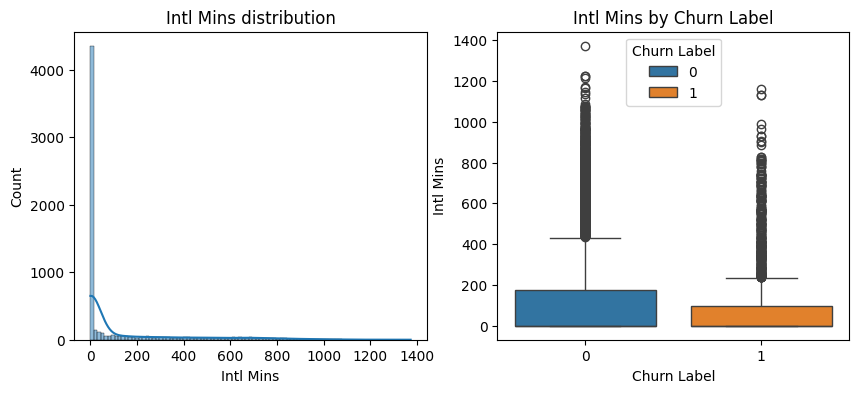

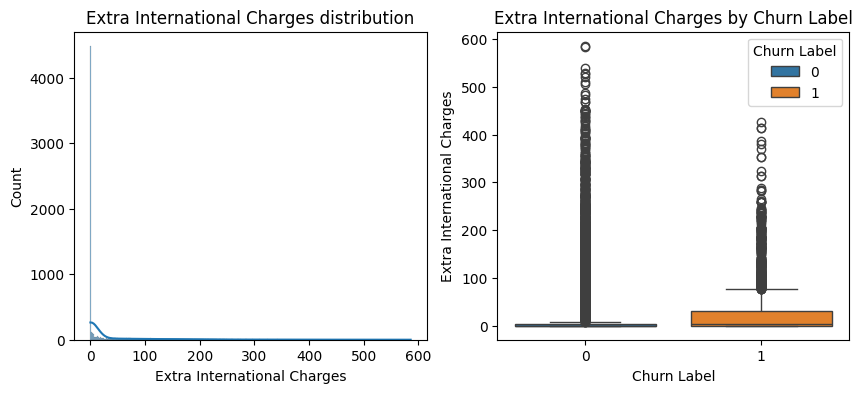

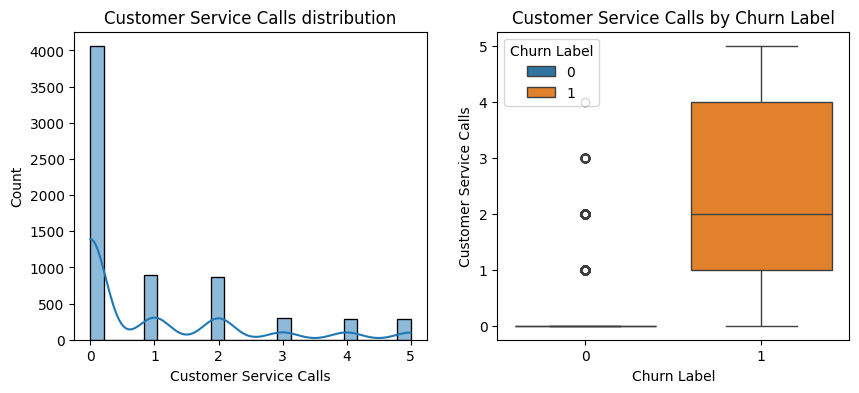

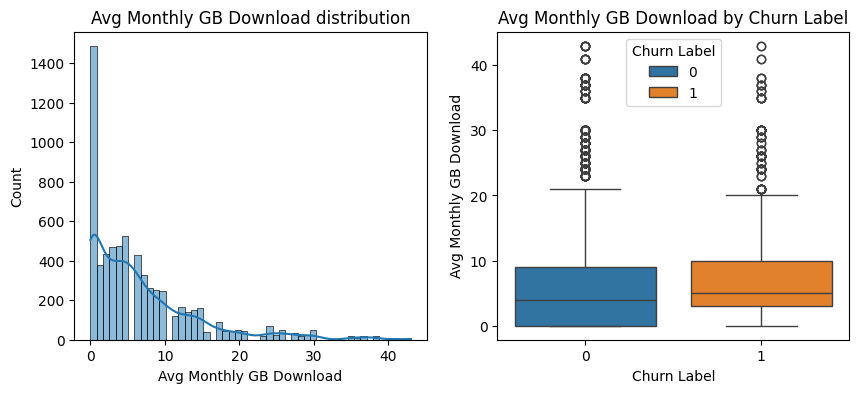

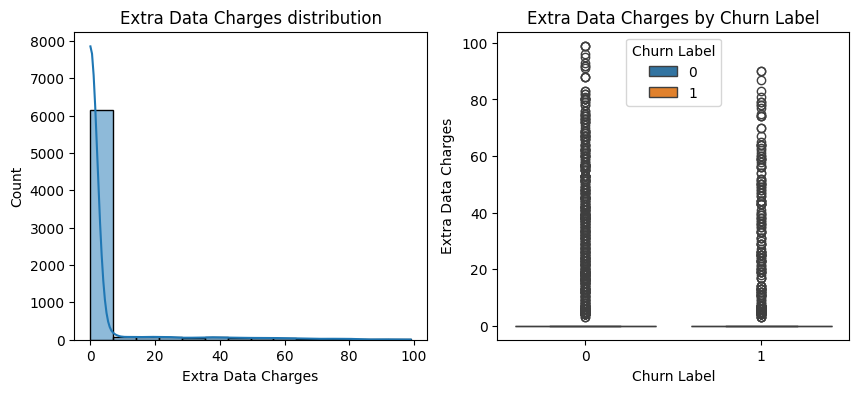

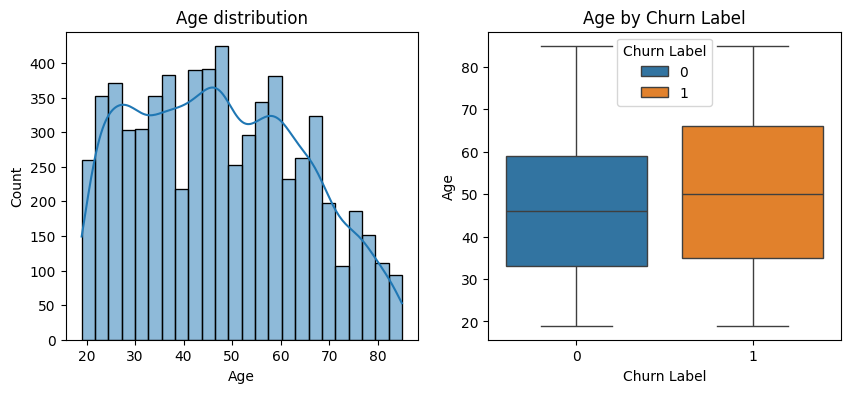

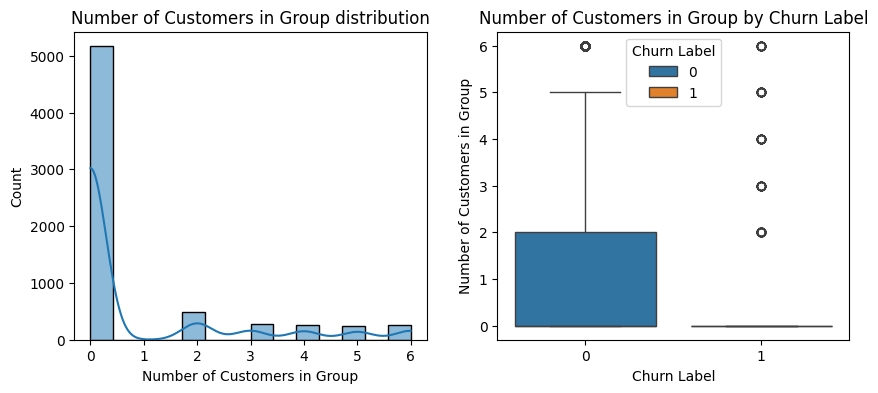

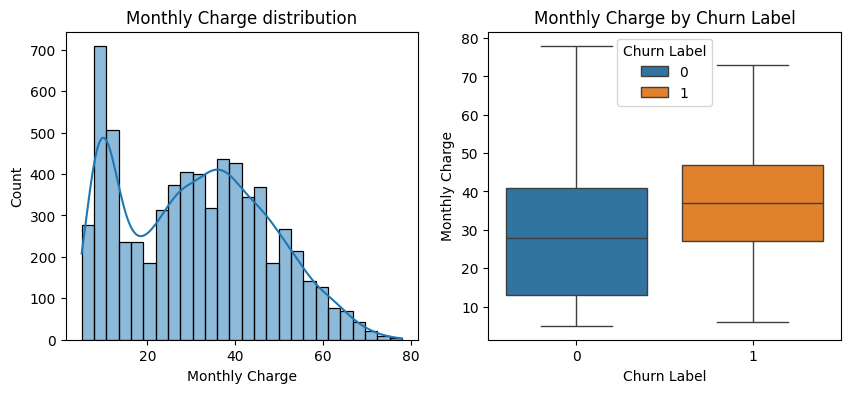

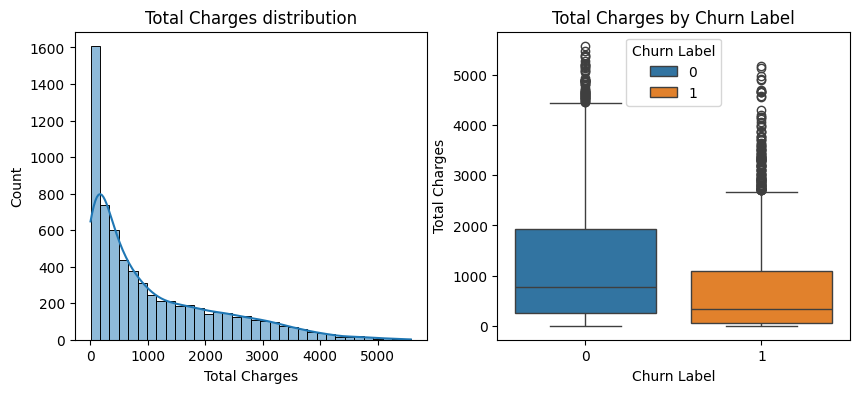

In [17]:
for num_feat in numerical_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    sns.histplot(data=data[num_feat], kde=True)
    plt.title(f"{num_feat} distribution")
    plt.subplot(122)
    sns.boxplot(x=data['Churn Label'], y=data[num_feat], hue=data['Churn Label'])
    plt.title(f"{num_feat} by Churn Label")
    plt.show()

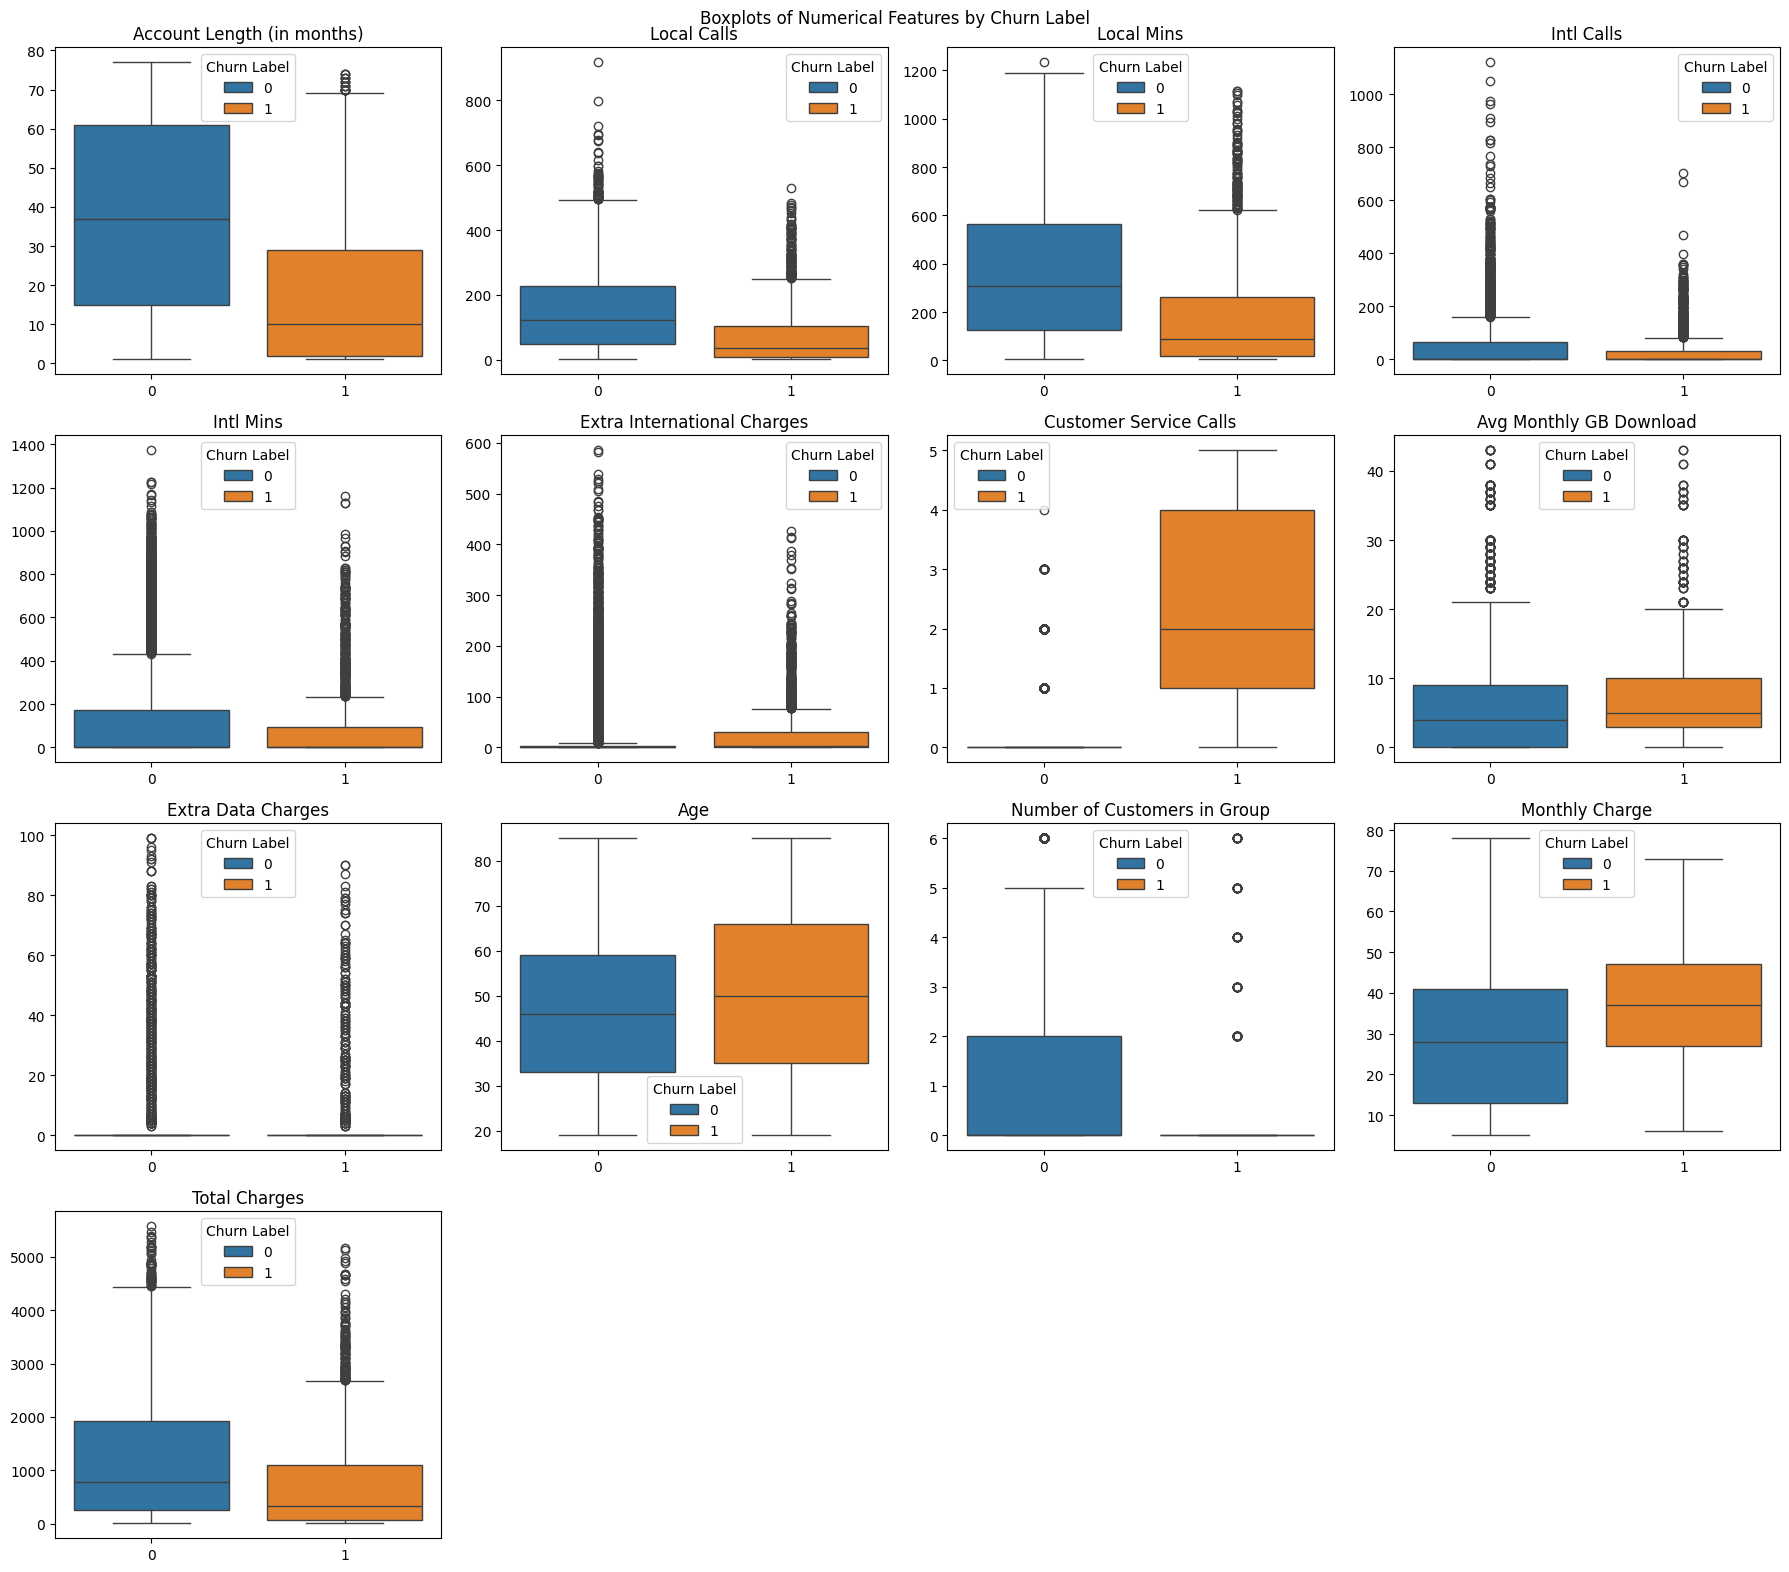

In [251]:
plt.figure(figsize=(18, 16))
for i, num_var in enumerate(numerical_vars):
    if i == 0:
        continue
    else:
        plt.subplot(4, 4, i)
        sns.boxplot(x=data['Churn Label'], y=data[num_var], hue=data['Churn Label'])
        plt.title(num_var)
        plt.xlabel('')
        plt.ylabel('')

plt.suptitle('Boxplots of Numerical Features by Churn Label')
plt.tight_layout()
plt.show()

In [18]:
print(f"Num_features: {numerical_vars}\n\nCat_features: {categorical_vars}")

Num_features: ['Churn Label', 'Account Length (in months)', 'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Extra International Charges', 'Customer Service Calls', 'Avg Monthly GB Download', 'Extra Data Charges', 'Age', 'Number of Customers in Group', 'Monthly Charge', 'Total Charges']

Cat_features: ['Customer ID', 'Intl Active', 'Intl Plan', 'Unlimited Data Plan', 'State', 'Gender', 'Under 30', 'Senior', 'Group', 'Device Protection & Online Backup', 'Contract Type', 'Payment Method', 'Churn Category', 'Churn Reason']


In [19]:
data['Churn Label'].unique()

array([0, 1], dtype=int64)

### **Selected Numerical Features Based on Visual EDA**
1. **Account Length**  
   - Shorter-tenure users show significantly higher churn.
   - Strong signal of customer loyalty and lifecycle stage.

2. **Local Calls & Local Minutes**  
   - Churners are generally low users of local calling services, indicating disengagement.

3. **Avg Monthly GB Download**  
   - Higher data usage among churners suggests potential dissatisfaction with data plans or perceived value.

4. **Extra International Charges**  
   - While usage is low, churners exhibit slightly higher charges, indicating potential pricing friction.

5. **Customer Service Calls**  
   - Strong churn indicator — users with 2+ calls are far more likely to leave, reflecting dissatisfaction or unresolved issues.

6. **Number of Customers in a Group**  
   - Users not in group plans are more likely to churn, confirming the importance of bundled offerings.

7. **Monthly Charges**  
   - Bimodal distribution; churners heavily skew toward higher monthly spend.

8. **Total Charges**  
   - Churners are typically low total spenders, indicating low customer lifetime value.

---

In [20]:
cat_features = data.select_dtypes(include='object').columns.difference(['Customer ID', 'Churn Reason', 'Churn Category'])
print(cat_features)

Index(['Contract Type', 'Device Protection & Online Backup', 'Gender', 'Group',
       'Intl Active', 'Intl Plan', 'Payment Method', 'Senior', 'State',
       'Under 30', 'Unlimited Data Plan'],
      dtype='object')


<Figure size 1000x1500 with 0 Axes>

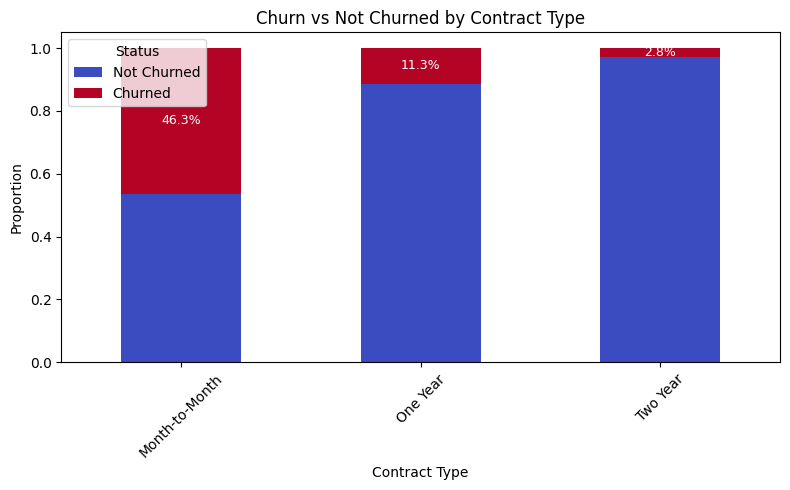

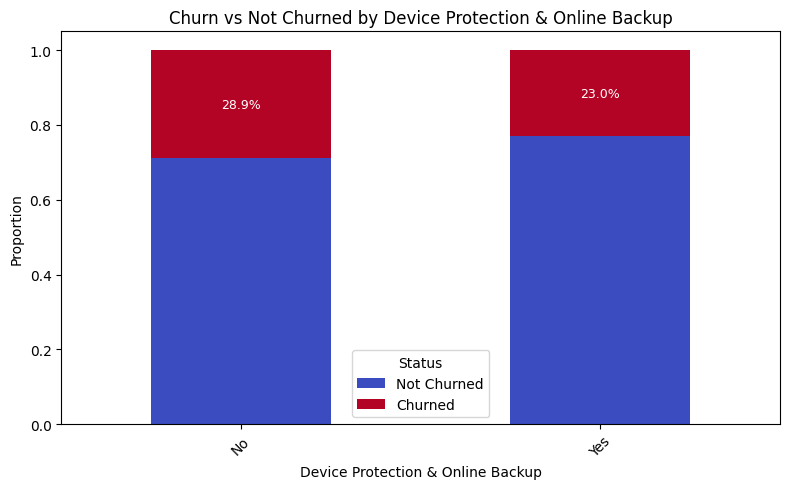

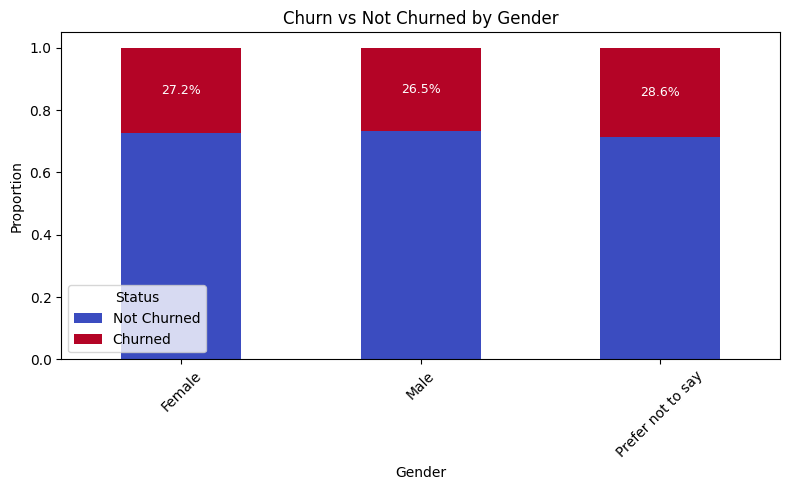

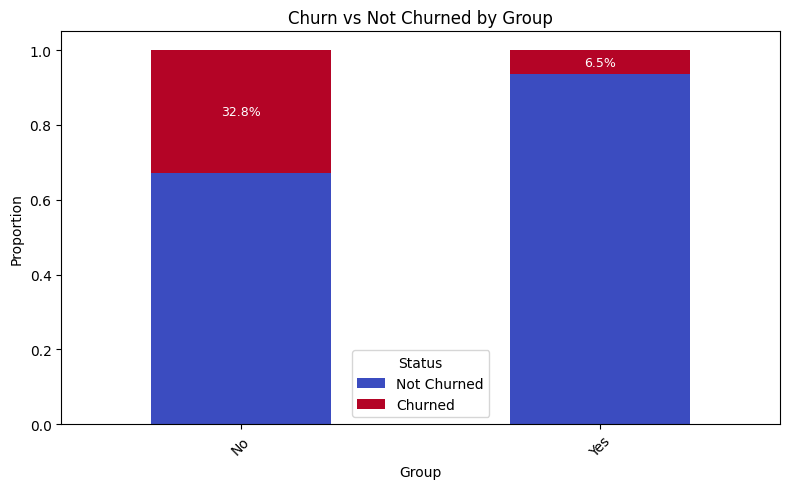

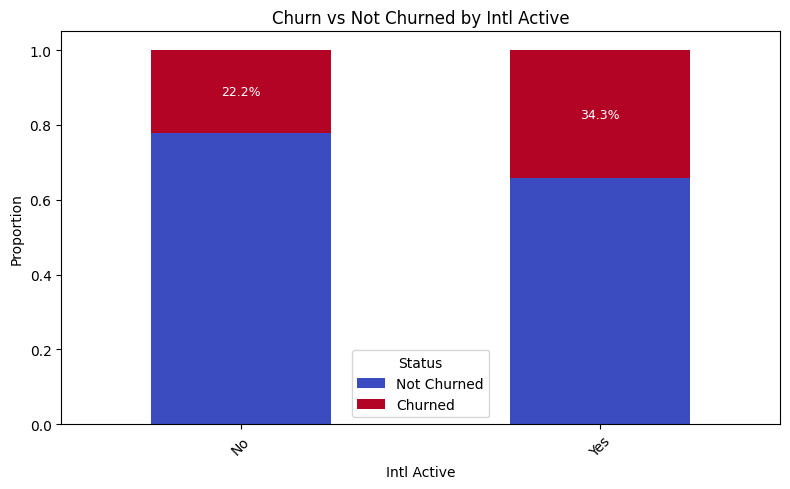

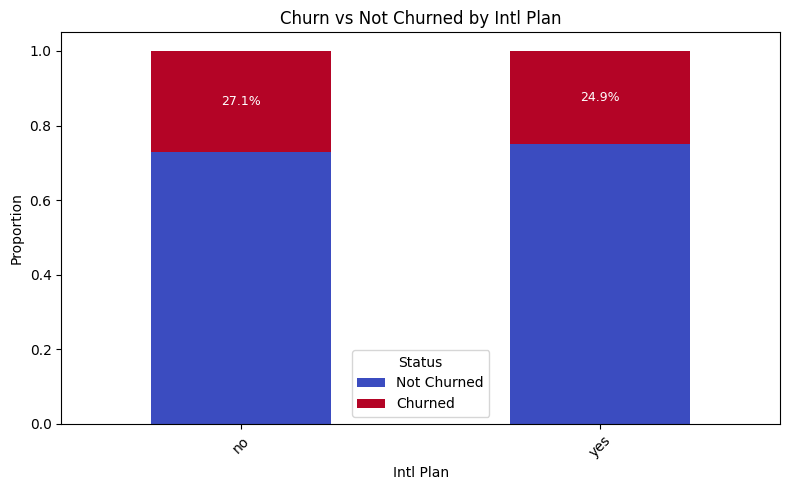

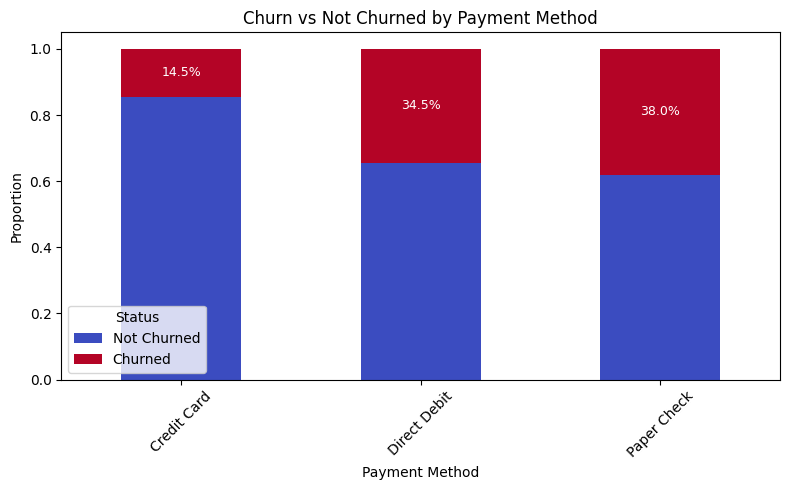

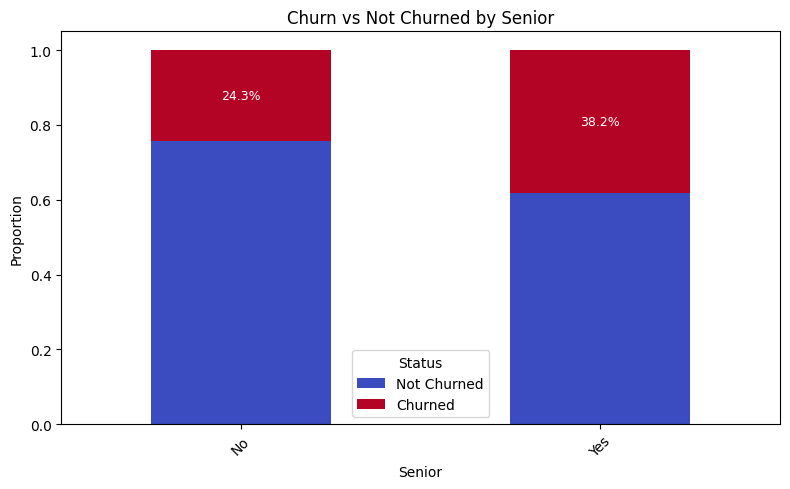

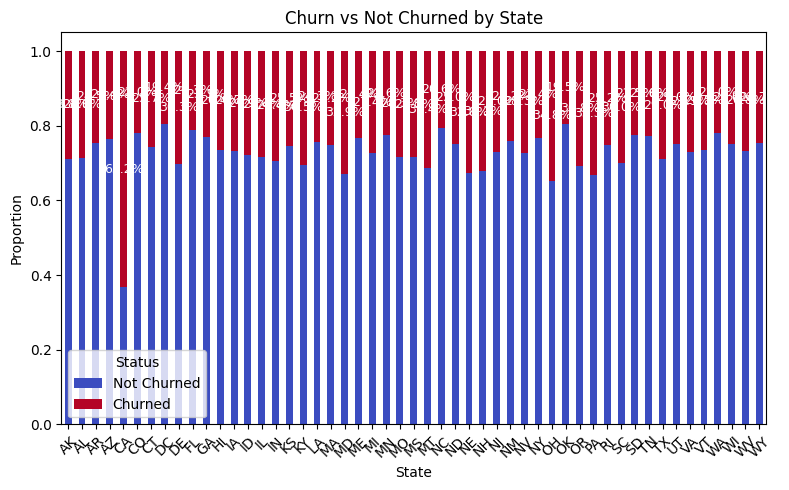

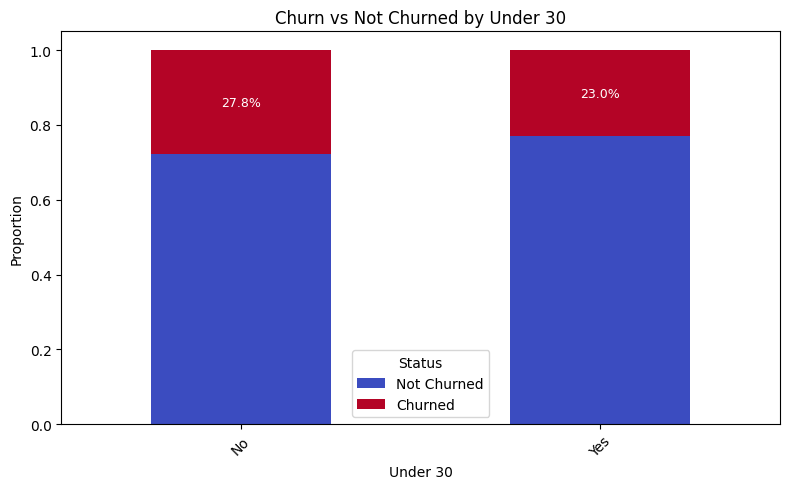

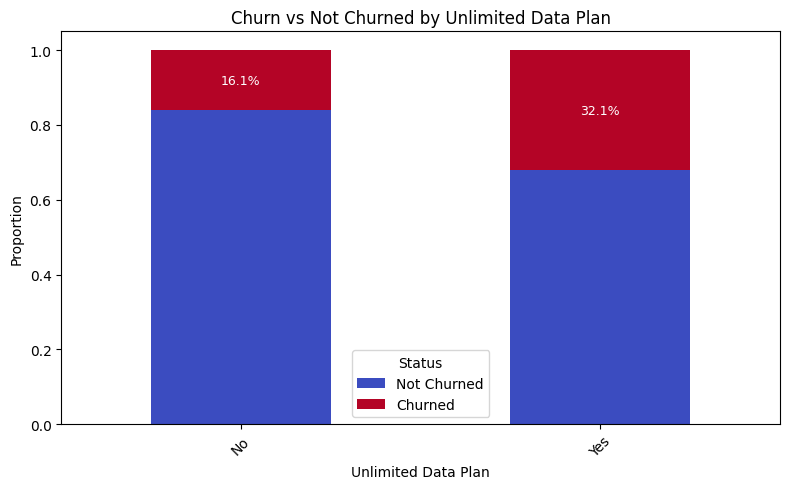

In [21]:
plt.figure(figsize=(10, 15))
for feature in cat_features:
    if feature in data.columns:
        # Calculate proportions
        crosstab = pd.crosstab(data[feature], data['Churn Label'], normalize='index')
        crosstab.columns = ['Not Churned', 'Churned']

        # Plot
        ax = crosstab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
        plt.title(f'Churn vs Not Churned by {feature}')
        plt.ylabel('Proportion')
        plt.xlabel(feature)
        plt.xticks(rotation=45)
        plt.legend(title='Status')

        # Annotate churn rate on the 'Churned' segment
        for i, (idx, row) in enumerate(crosstab.iterrows()):
            y_pos = row['Not Churned'] + row['Churned'] / 2
            churn_pct = row['Churned']
            ax.text(i, y_pos, f"{churn_pct:.1%}", ha='center', va='center', color='white', fontsize=9)

        plt.tight_layout()
        plt.show()


### **Selected Categorical Features Based on Visual EDA**

These categorical features demonstrated strong class separation or churn relevance when visualized using bar plots and churn proportions:

1. **Contract Type**  
   - Churn is heavily concentrated among month-to-month users. Longer-term contracts have significantly lower churn rates.

2. **Group**  
   - Customers enrolled in group plans have drastically lower churn (~6%) compared to solo users (~33%).

3. **International Active**  
   - Users with an active international plan are more likely to churn — possible dissatisfaction with service quality or costs.

4. **Payment Method**  
   - Direct Debit and Paper Check users have the highest churn rates. Credit Card users show more stability.

5. **Senior**  
   - Older customers are more prone to churn, likely due to service complexity or evolving needs.

6. **Unlimited Data Plan**  
   - Unexpectedly high churn rate among unlimited plan users suggests unmet expectations or dissatisfaction with plan execution.

---

### Churn Rate Over Time (Tenure Group) - EDA

C:\Users\Vijay\AppData\Local\Temp\ipykernel_24976\1033474765.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = data.groupby('Tenure Group')['Churn Label'].mean()


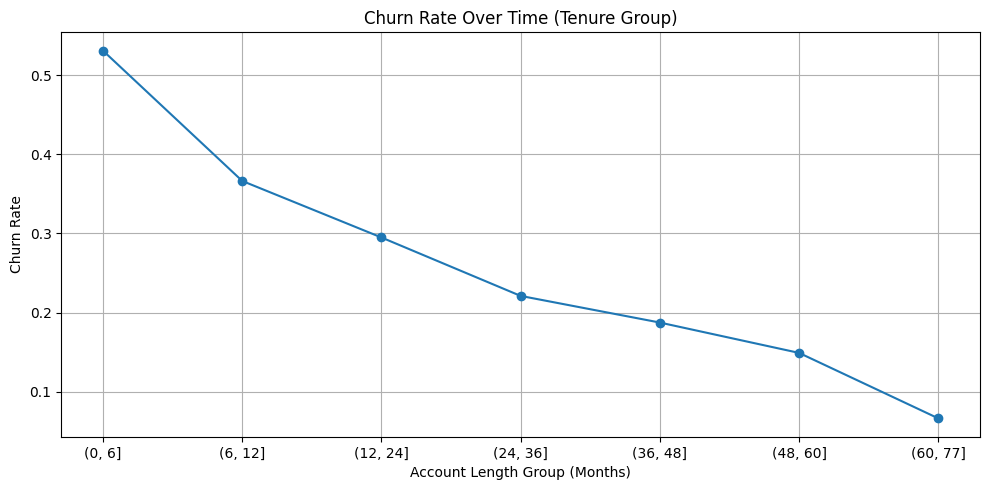

In [22]:
data['Tenure Group'] = pd.cut(data['Account Length (in months)'], bins=[0, 6, 12, 24, 36, 48, 60, data['Account Length (in months)'].max()])
churn_by_tenure = data.groupby('Tenure Group')['Churn Label'].mean()

plt.figure(figsize=(10, 5))
churn_by_tenure.plot(kind='line', marker='o')
plt.title('Churn Rate Over Time (Tenure Group)')
plt.ylabel('Churn Rate')
plt.xlabel('Account Length Group (Months)')
plt.grid(True)
plt.tight_layout()
plt.show()

---

**Churn Rate decreases as tenure increases, indicating that short term customers are highly likely to churn**

---


### LTV Lost by Age Group of Churned Customers

C:\Users\Vijay\AppData\Local\Temp\ipykernel_24976\4274474866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_revenue = data[data['Churn Label'] == 1].groupby('Age Group')['Total Charges'].sum()


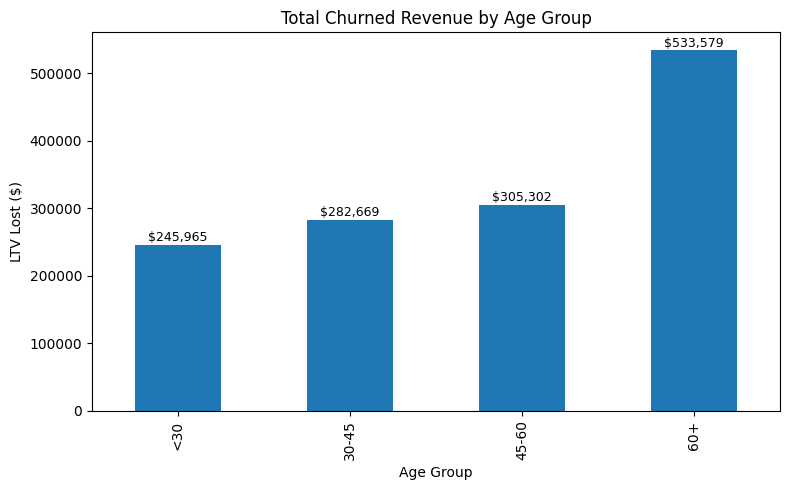

In [23]:
data['Age Group'] = pd.cut(data['Age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '60+'])
churned_revenue = data[data['Churn Label'] == 1].groupby('Age Group')['Total Charges'].sum()

plt.figure(figsize=(8, 5))
churned_revenue.plot(kind='bar')
plt.title('Total Churned Revenue by Age Group')
plt.ylabel('LTV Lost ($)')
plt.xlabel('Age Group')

for i, val in enumerate(churned_revenue):
    plt.text(i, val+1000, f"${val:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

---

**Customers of age 45 and above contribute to a significant LTV loss of more than 300,000$.**

---

### Contract Type & Payment Method Churn Rate

<Axes: xlabel='Payment Method', ylabel='Contract Type'>

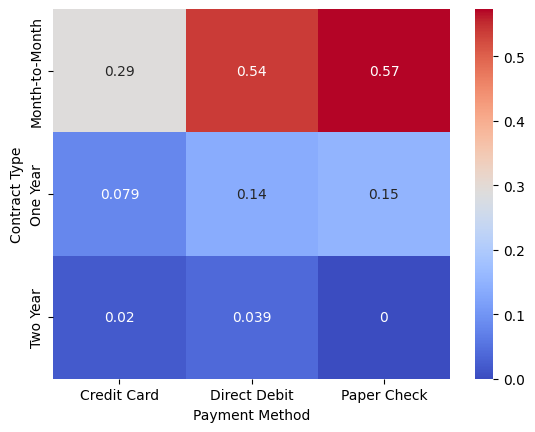

In [24]:
pivot = pd.crosstab(data['Contract Type'], data['Payment Method'], 
                    values=data['Churn Label'], aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm')


---

**Customers enrolled in a Month-to-Month contract that are using payment methods such as direct debit and paper check are high churners.**

---

### Churn Rate based on Contract Type

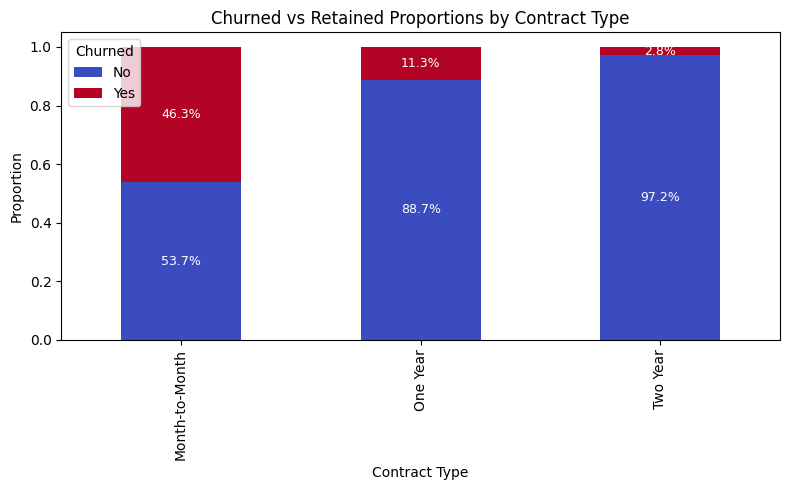

In [25]:
contract_crosstab = pd.crosstab(data['Contract Type'], data['Churn Label'], normalize='index')

# Plot
ax = contract_crosstab.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 5))

# Add text labels on top of each bar segment
for i, (idx, row) in enumerate(contract_crosstab.iterrows()):
    y_bottom = 0
    for j, value in enumerate(row):
        y = y_bottom + value / 2
        ax.text(i, y, f"{value:.1%}", ha='center', va='center', fontsize=9, color='white')
        y_bottom += value

# Final touches
plt.title('Churned vs Retained Proportions by Contract Type')
plt.ylabel('Proportion')
plt.xlabel('Contract Type')
plt.legend(title='Churned', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


## C. Answering Stakeholder questions

### What are the top drivers of customer churn?

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
data['Gender_enc'] = le.fit_transform(data['Gender'])

In [28]:
drop_features = ['Customer ID', 'State', 'Gender', 'Churn Category', 'Churn Reason', 'Tenure Group', 'Age Group']

In [29]:
data_hm = data.drop(columns=drop_features, errors='ignore')

In [30]:
cat_cols = list(data_hm.describe(include='object').keys())
data_enc = pd.get_dummies(data_hm, columns=cat_cols, drop_first=False)

In [31]:
correlation_matrix = data_enc.corr()

In [32]:
churn_corr_full = correlation_matrix['Churn Label'].drop('Churn Label').sort_values()

C:\Users\Vijay\AppData\Local\Temp\ipykernel_24976\3084422336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr_full.values, y=churn_corr_full.index, palette='coolwarm')


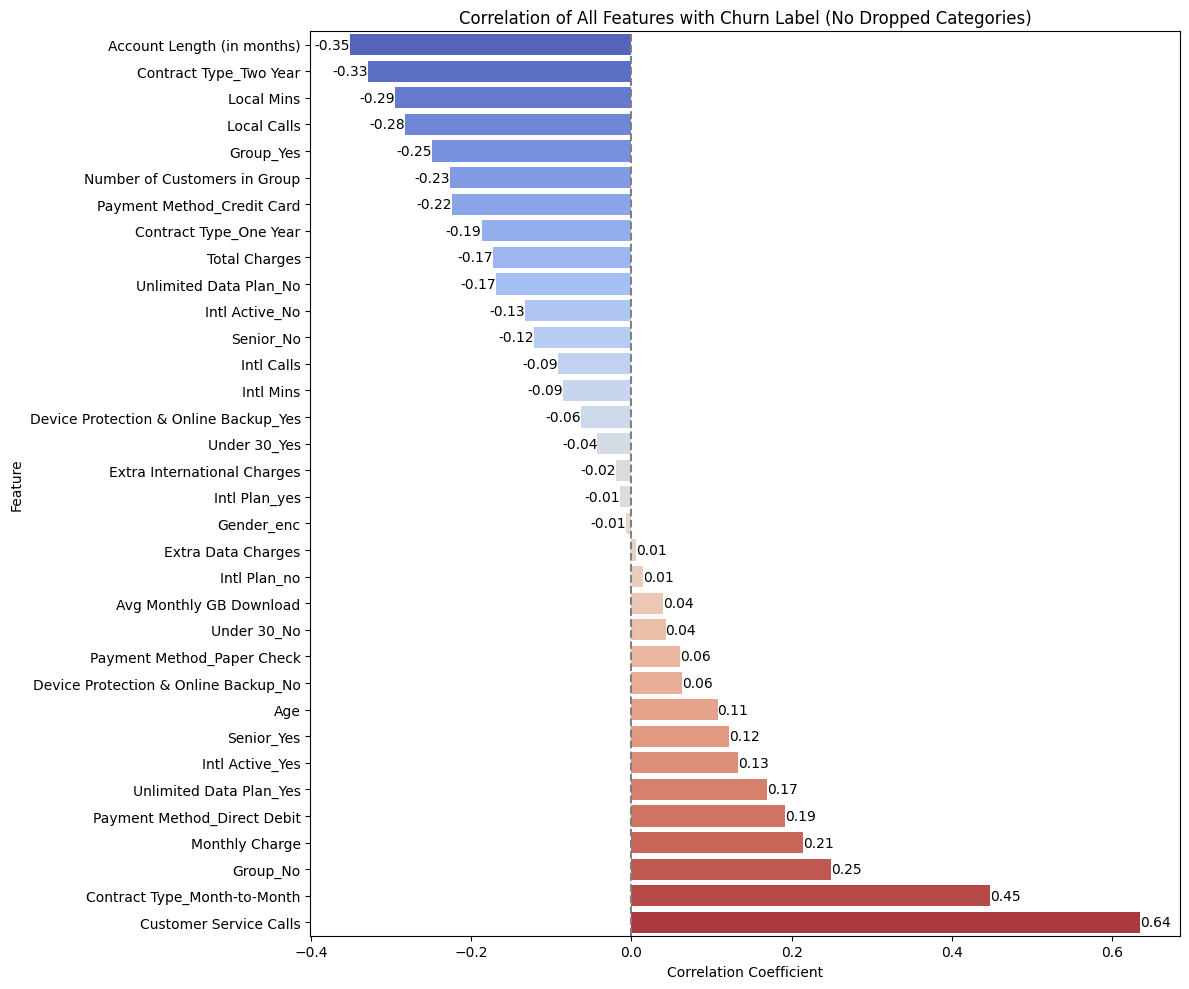

In [33]:
plt.figure(figsize=(12, 10))
sns.barplot(x=churn_corr_full.values, y=churn_corr_full.index, palette='coolwarm')
plt.title('Correlation of All Features with Churn Label (No Dropped Categories)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')

for i, val in enumerate(churn_corr_full.values):
    plt.text(val, i, f"{val:.2f}", va='center', ha='right' if val < 0 else 'left', color='black')

plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

---

Selected features based on correlation:

**Features with positive correlation are more likely to contribute towards churn, and negative correlation are less likely to contribute to churn.**

**Numerical Features**

- Account Length: Longer tenure reduces churn
- Local Mins: Higher usage indicates engagement which reduces churn
- Local Calls: Higher usage indicates engagement which reduces churn
- Total Charges: Measurement for lifetime value.
- Monthly Charges: Higher values linked to higher churn
- Customer Service Calls: Most predictive churn driver


**Categorical Features**
- Contract Type: A strong churn predictor highlighting that month-to-month users strongly increase churn
- Group: Group Members are more loyal
- Number of Customers in a Group: Quantifies group effect
- Payment Method: Paper & Direct Debit users churn more
- Unlimited Data Plan: Users with the plan churn more
- International Active: Active international users churn more
- Senior: are slightly more prone to churn


**Features with strong correlation have an absolute strength of 0.1 or above.**

**Low Confidence: Avg Monthly GB & Extra International Charges**

---

### Visual EDA & Feature Correlation Insights Summary

The visual EDA and correlation matrix both converge on the same key drivers of churn, highlighting the accuracy of the analysis conducted.

The selected key drivers of churn are the following: Account Lenght, Local calls, Local Mins, Total Charges, Monthly Charges, Customer service calls, Contract type, Group, Number of customers in a group, payment method, unlimited data plan, international active, and senior.

The only 2 features that will be disregarded are Average Monthly GB & Extra international charges due to the low correlation value obtained with respect to the churn label.

---

### Does the presence of an international or unlimited data plan affect churn?

In [34]:
segment_col = 'Intl Plan'
segment_analysis = data.groupby(segment_col).agg(
    total_customers=('Customer ID', 'count'),
    churned_customers=('Churn Label', 'sum'),
    total_ltv=('Total Charges', 'sum'),
    ltv_lost=('Total Charges', lambda x: data.loc[x.index, 'Churn Label'].mul(x).sum())
)

segment_analysis['churn_rate'] = segment_analysis['churned_customers'] / segment_analysis['total_customers']
segment_analysis = segment_analysis.sort_values(by='ltv_lost', ascending=False)

segment_analysis

,total_customers,churned_customers,total_ltv,ltv_lost,churn_rate
Intl Plan,,,,,
no,6036,1634,6570876,1259934,0.270709
yes,651,162,676198,107581,0.248848


---

**International plan does not affect churn since the churn rate is quite marginal, and customers who use the plan represent a small segment of the total customer base, therefor this feature does no affect churn significantly**

---

In [35]:
segment_col = 'Unlimited Data Plan'
segment_analysis = data.groupby(segment_col).agg(
    total_customers=('Customer ID', 'count'),
    churned_customers=('Churn Label', 'sum'),
    total_ltv=('Total Charges', 'sum'),
    ltv_lost=('Total Charges', lambda x: data.loc[x.index, 'Churn Label'].mul(x).sum())
)

segment_analysis['churn_rate'] = segment_analysis['churned_customers'] / segment_analysis['total_customers']
segment_analysis = segment_analysis.sort_values(by='ltv_lost', ascending=False)

segment_analysis

,total_customers,churned_customers,total_ltv,ltv_lost,churn_rate
Unlimited Data Plan,,,,,
Yes,4494,1443,5848706,1148233,0.321095
No,2193,353,1398368,219282,0.160967


---

**Customers with unlimited data plan have a churn rate of 32.1%, have a LTV Lost of more than 1 Million Dollars it is a important matter to be looked at**

---

### How does customer service interaction affect churn?

In [36]:
data['Service Calls Group'] = pd.cut(
    data['Customer Service Calls'],
    bins=[-1, 0, 3, data['Customer Service Calls'].max()],
    labels=['0 Calls', '1–3 Calls', '4–5 Calls']
)


In [37]:
grouped = data.groupby('Service Calls Group').agg(
    total_customers=('Customer ID', 'count'),
    churned_customers=('Churn Label', 'sum'),
    total_ltv=('Total Charges', 'sum'),
    ltv_lost=('Total Charges', lambda x: data.loc[x.index, 'Churn Label'].mul(x).sum())
)

grouped['churn_rate'] = grouped['churned_customers'] / grouped['total_customers']


C:\Users\Vijay\AppData\Local\Temp\ipykernel_24976\938477784.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('Service Calls Group').agg(


In [38]:
grouped

,total_customers,churned_customers,total_ltv,ltv_lost,churn_rate
Service Calls Group,,,,,
0 Calls,4056,361,4734996,287158,0.089004
1–3 Calls,2049,854,2065818,636208,0.416789
4–5 Calls,582,581,446260,444149,0.998282


---

**Customers who call customer service quite frequently have a high churn rate. People who make at least one up to 3 calls have a 41.6% churn rate, whereas any more than 3 calls increases the churn rate up to 99%, indicating a guaranteed churn.**

---

### What are the most common churn reasons and how can we address them?


In [39]:
churned = data[data['Churn Label'] == 1]

churn_reason_summary = churned.groupby('Churn Reason').agg(
    churned_customers=('Customer ID', 'count'),
    ltv_lost=('Total Charges', 'sum')
).sort_values(by='churned_customers', ascending=False)

In [40]:
churn_reason_summary

,churned_customers,ltv_lost
Churn Reason,,
Competitor made better offer,303,222908
Competitor had better devices,297,212389
Attitude of support person,203,139823
Don't know,123,98092
Competitor offered more data,110,103041
Competitor offered higher download speeds,95,84419
Attitude of service provider,84,64652
Price too high,74,61075
Product dissatisfaction,73,75055


---

**There are 4 major categories where we can cluster the reasons into: Competitive offers, Customer Service Experience, Price & Value, and Product & Network performance**

1. Competitive Offers
- 805 churned customers, $622,757 LTV lost
- Reason: Competitors provided better pricing, devices, data, or speeds.
- Strategy: Launch targeted retention offers, promote device upgrades, and offer exclusive bundles to stay competitive.

3. Customer Service Experience
- 354 churned customers, $242,087 LTV lost
- Reason: Dissatisfaction with the attitude and professionalism of support staff.
- Strategy: Invest in communication and conflict resolution training, enhance support across all channels, and implement AI/chatbot tools to reduce repetitive inquiries.

3. Price & Value Perception
- 172 churned customers, $136,472 LTV lost
- Reason: Customers feel they are overpaying or encountering unexpected charges.
- Strategy: Provide transparent pricing, introduce capped or rollover data plans, and deploy alerts and savings recommendations for heavy users.

4. Product & Network Performance
- 205 churned customers, $159,969 LTV lost
- Reason: Poor product satisfaction and unreliable network service.
- Strategy: Improve infrastructure and coverage, run regular satisfaction surveys, and offer temporary plan upgrades during issue resolution.


Overall, majority of churn is driven by competition, poor customer support experience, and pricing.

---



## D. Feature Engineering & Selection

In [41]:
data.keys()

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason', 'Tenure Group', 'Age Group',
       'Gender_enc', 'Service Calls Group'],
      dtype='object')

In [42]:
data.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason,Tenure Group,Age Group,Gender_enc,Service Calls Group
0,4444-BZPU,0,1,3,8.0,0.0,0.0,No,no,0.0,...,Month-to-Month,Direct Debit,10,10,Not Churned,Not Churned,"(0, 6]",30-45,0,0 Calls
1,5676-PTZX,0,33,179,431.3,0.0,0.0,No,no,0.0,...,One Year,Paper Check,21,703,Not Churned,Not Churned,"(24, 36]",45-60,1,0 Calls
2,8532-ZEKQ,0,44,82,217.6,0.0,0.0,No,yes,0.0,...,One Year,Direct Debit,23,1014,Not Churned,Not Churned,"(36, 48]",45-60,1,0 Calls
3,1314-SMPJ,0,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,Month-to-Month,Paper Check,17,177,Not Churned,Not Churned,"(6, 12]",30-45,0,0 Calls
4,2956-TXCJ,0,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,One Year,Direct Debit,28,1720,Not Churned,Not Churned,"(60, 77]",45-60,1,0 Calls


#### 3 versions of the data will be created

- Version 1: Original dataset
- Version 2: Important features only dataset
- Version 3: Important features & Feature engineering variables & Collinearity removal

In [169]:
data_copy = data.copy()
features_to_drop = ['Customer ID', 'State', 'Tenure Group', 'Age Group', 'Gender_enc', 'Service Calls Group']
data_copy = data_copy.drop(columns=features_to_drop)

In [170]:
data_v1 = data_copy.copy()
data_v2 = data_copy.copy()
data_v3 = data_copy.copy()

In [171]:
features = ['Account Length (in months)', 'Local Mins', 'Local Calls', 'Total Charges', 'Monthly Charge', 'Customer Service Calls', 'Contract Type',
           'Group', 'Number of Customers in Group', 'Payment Method', 'Unlimited Data Plan', 'Intl Active', 'Senior', 'Churn Label']

data_v2 = data_v2[features]
data_v3 = data_v3[features]

In [172]:
data_v1.head()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,0,1,3,8.0,0.0,0.0,No,no,0.0,0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,Not Churned,Not Churned
1,0,33,179,431.3,0.0,0.0,No,no,0.0,0,...,No,No,0,Yes,One Year,Paper Check,21,703,Not Churned,Not Churned
2,0,44,82,217.6,0.0,0.0,No,yes,0.0,0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,Not Churned,Not Churned
3,0,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,Not Churned,Not Churned
4,0,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,...,No,No,0,No,One Year,Direct Debit,28,1720,Not Churned,Not Churned


In [173]:
vers1 = data_v1.drop(columns=['Churn Category', 'Churn Reason'])
y_v1 = vers1['Churn Label']
x_v1 = vers1.drop(columns=['Churn Label'])

In [175]:
x_v1_enc = pd.get_dummies(x_v1, columns=x_v1.select_dtypes(include='object').columns.tolist(), dtype=int, drop_first=False)
print(f"Encoded data shape and label shape: {x_v1_enc.shape}, {y_v1.shape}")

Encoded data shape and label shape: (6687, 36), (6687,)


In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
# unscaled version
x_train_v1, x_test_v1, y_train_v1, y_test_v1 = train_test_split(x_v1_enc.copy(), y_v1, test_size=0.3, stratify=y_v1, random_state=42)

# scaled version
num_columns = x_v1.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
x_v1_scaled = x_v1_enc.copy()
x_v1_scaled[num_columns] = scaler.fit_transform(x_v1_scaled[num_columns])
x_train_v1_scaled, x_test_v1_scaled, y_train_v1_scaled, y_test_v1_scaled = train_test_split(x_v1_scaled, y_v1, test_size=0.3, stratify=y_v1, random_state=42)


In [179]:
# Output shapes for verification
{
    "Scaled (LogReg)": (x_train_v1_scaled.shape, x_test_v1_scaled.shape),
    "Unscaled (RF/XGB)": (x_train_v1.shape, x_test_v1.shape)
}


{'Scaled (LogReg)': ((4680, 36), (2007, 36)),
 'Unscaled (RF/XGB)': ((4680, 36), (2007, 36))}

#### Evaluating Models using Scaled data on version 1 dataset

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [181]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
}

logreg_tuned = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg_tuned, param_grid, cv=5, scoring='f1', n_jobs=-1, error_score='raise')

grid_search.fit(x_train_v1_scaled, y_train_v1_scaled)

best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(x_test_v1_scaled)

tuned_accuracy = accuracy_score(y_test_v1_scaled, y_pred_best)
tuned_conf_matrix = confusion_matrix(y_test_v1_scaled, y_pred_best)
tuned_report = classification_report(y_test_v1_scaled, y_pred_best, output_dict=False)
best_params = grid_search.best_params_

print(f"Tuned Model Accuracy: {tuned_accuracy}")
print(tuned_report)
print(best_params)

Tuned Model Accuracy: 0.8963627304434479
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1468
           1       0.85      0.75      0.80       539

    accuracy                           0.90      2007
   macro avg       0.88      0.85      0.86      2007
weighted avg       0.89      0.90      0.89      2007

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [182]:
def heatmap_vis(confusion_matrix):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

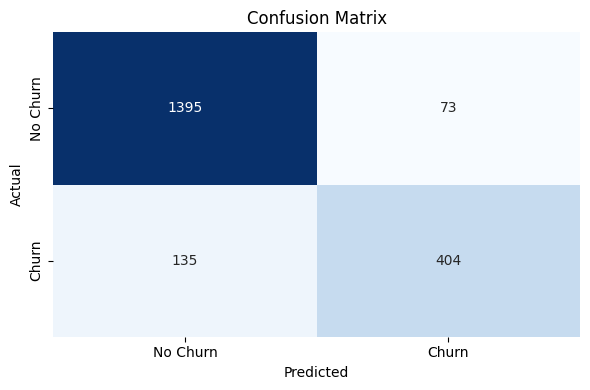

In [183]:
heatmap_vis(tuned_conf_matrix)

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 10, 20, 20],
    'min_samples_split': [2, 5, 6, 9],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest and GridSearch
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(x_train_v1_scaled, y_train_v1_scaled)

# Best model evaluation
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(x_test_v1_scaled)

rf_accuracy = accuracy_score(y_test_v1_scaled, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test_v1_scaled, y_pred_rf)
rf_report = classification_report(y_test_v1_scaled, y_pred_rf, output_dict=False)
rf_best_params = rf_grid.best_params_

print(f"Random Forest Accuracy: {rf_accuracy}")
print(rf_report)
print(rf_best_params)


Random Forest Accuracy: 0.9073243647234679
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1468
           1       0.86      0.78      0.82       539

    accuracy                           0.91      2007
   macro avg       0.89      0.87      0.88      2007
weighted avg       0.91      0.91      0.91      2007

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 300}


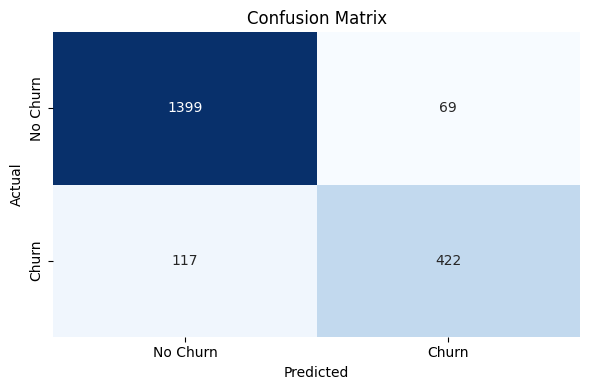

In [185]:
heatmap_vis(rf_conf_matrix)

In [186]:
from xgboost import XGBClassifier

In [187]:
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'subsample': [0.8, 1.0]
}

# Grid search for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(x_train_v1_scaled, y_train_v1_scaled)

# Evaluate best model
best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(x_test_v1_scaled)
xgb_cm = confusion_matrix(y_test_v1_scaled, y_pred)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v1_scaled, y_pred))
print("Classification Report:\n", classification_report(y_test_v1_scaled, y_pred))

C:\Users\Vijay\miniconda3\envs\ds\lib\site-packages\xgboost\core.py:158: UserWarning: [00:34:37] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.911310413552566
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1468
           1       0.85      0.81      0.83       539

    accuracy                           0.91      2007
   macro avg       0.89      0.88      0.89      2007
weighted avg       0.91      0.91      0.91      2007



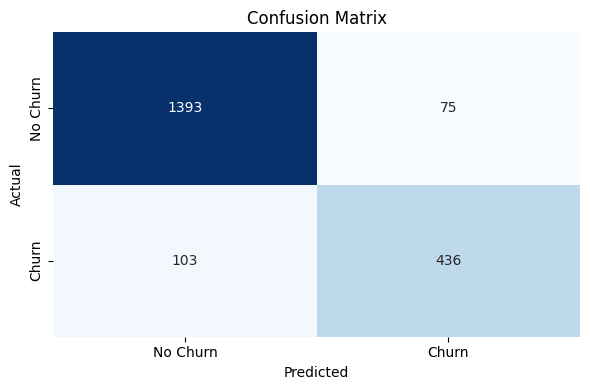

In [188]:
heatmap_vis(xgb_cm)

In [189]:
for i, key in enumerate(list(x_test_v1_scaled.keys())):
    print(f"{key}: {best_xgb.feature_importances_[i]}")

Account Length (in months): 0.014541098847985268
Local Calls: 0.015749366953969002
Local Mins: 0.01566586084663868
Intl Calls: 0.016764499247074127
Intl Mins: 0.015735547989606857
Extra International Charges: 0.023289388045668602
Customer Service Calls: 0.2237626314163208
Avg Monthly GB Download: 0.011572709307074547
Extra Data Charges: 0.010008773766458035
Age: 0.016998060047626495
Number of Customers in Group: 0.036907535046339035
Monthly Charge: 0.016048528254032135
Total Charges: 0.011759943328797817
Intl Active_No: 0.07703328132629395
Intl Active_Yes: 0.0
Intl Plan_no: 0.017938323318958282
Intl Plan_yes: 0.0
Unlimited Data Plan_No: 0.018428344279527664
Unlimited Data Plan_Yes: 0.0
Gender_Female: 0.009429770521819592
Gender_Male: 0.0
Gender_Prefer not to say: 0.0
Under 30_No: 0.0
Under 30_Yes: 0.0
Senior_No: 0.012148917652666569
Senior_Yes: 0.0
Group_No: 0.0
Group_Yes: 0.0
Device Protection & Online Backup_No: 0.010198875330388546
Device Protection & Online Backup_Yes: 0.0
Contract

#### Evaluating Models using unscaled version 1 data

In [190]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 50],
    'solver': ['liblinear'],
}

logreg_tuned = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg_tuned, param_grid, cv=5, scoring='f1', n_jobs=-1, error_score='raise')

grid_search.fit(x_train_v1, y_train_v1)

best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(x_test_v1)

tuned_accuracy = accuracy_score(y_test_v1, y_pred_best)
tuned_conf_matrix = confusion_matrix(y_test_v1, y_pred_best)
tuned_report = classification_report(y_test_v1, y_pred_best, output_dict=False)
best_params = grid_search.best_params_

print(f"Tuned Model Accuracy: {tuned_accuracy}")
print(tuned_report)
print(best_params)

Tuned Model Accuracy: 0.8968609865470852
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1468
           1       0.85      0.75      0.80       539

    accuracy                           0.90      2007
   macro avg       0.88      0.85      0.86      2007
weighted avg       0.89      0.90      0.89      2007

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


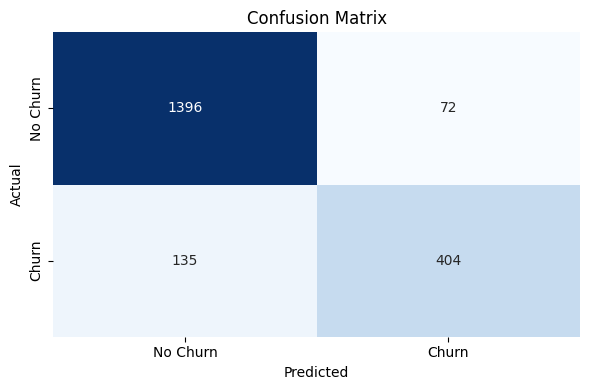

In [191]:
heatmap_vis(tuned_conf_matrix)

In [192]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 6, 9, 13],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest and GridSearch
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(x_train_v1, y_train_v1)

# Best model evaluation
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(x_test_v1)

rf_accuracy = accuracy_score(y_test_v1, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test_v1, y_pred_rf)
rf_report = classification_report(y_test_v1, y_pred_rf, output_dict=False)
rf_best_params = rf_grid.best_params_

print(f"Random Forest Accuracy: {rf_accuracy}")
print(rf_report)
print(rf_best_params)


Random Forest Accuracy: 0.9083208769307424
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1468
           1       0.86      0.78      0.82       539

    accuracy                           0.91      2007
   macro avg       0.89      0.87      0.88      2007
weighted avg       0.91      0.91      0.91      2007

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 300}


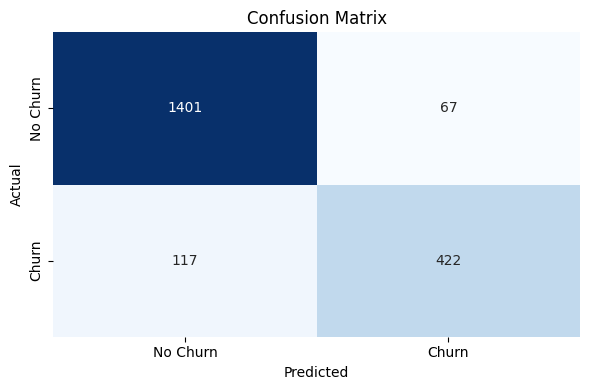

In [193]:
heatmap_vis(rf_conf_matrix)

In [194]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.5],
    'subsample': [0.8, 1.0]
}

# Grid search for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(x_train_v1, y_train_v1)

# Evaluate best model
best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(x_test_v1)
xgb_cm = confusion_matrix(y_test_v1, y_pred)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v1, y_pred))
print("Classification Report:\n", classification_report(y_test_v1, y_pred))

C:\Users\Vijay\miniconda3\envs\ds\lib\site-packages\xgboost\core.py:158: UserWarning: [00:37:08] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.911310413552566
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1468
           1       0.85      0.81      0.83       539

    accuracy                           0.91      2007
   macro avg       0.89      0.88      0.89      2007
weighted avg       0.91      0.91      0.91      2007



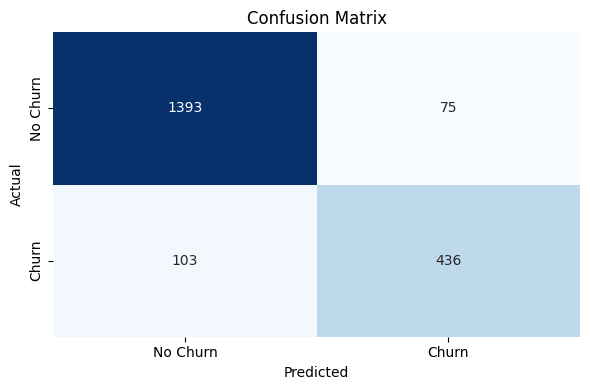

In [195]:
heatmap_vis(xgb_cm)

In [196]:
data_v2.head()

,Account Length (in months),Local Mins,Local Calls,Total Charges,Monthly Charge,Customer Service Calls,Contract Type,Group,Number of Customers in Group,Payment Method,Unlimited Data Plan,Intl Active,Senior,Churn Label
0,1,8.0,3,10,10,0,Month-to-Month,No,0,Direct Debit,Yes,No,No,0
1,33,431.3,179,703,21,0,One Year,No,0,Paper Check,Yes,No,No,0
2,44,217.6,82,1014,23,0,One Year,No,0,Direct Debit,Yes,No,No,0
3,10,111.6,47,177,17,0,Month-to-Month,No,0,Paper Check,Yes,Yes,No,0
4,62,621.2,184,1720,28,0,One Year,No,0,Direct Debit,Yes,Yes,No,0


In [197]:
list(data_v2.keys())

['Account Length (in months)',
 'Local Mins',
 'Local Calls',
 'Total Charges',
 'Monthly Charge',
 'Customer Service Calls',
 'Contract Type',
 'Group',
 'Number of Customers in Group',
 'Payment Method',
 'Unlimited Data Plan',
 'Intl Active',
 'Senior',
 'Churn Label']

In [198]:
v2_cat_cols = data_v2.select_dtypes(include='object').columns.tolist()
x_v2_enc = data_v2.copy()
x_v2_enc = pd.get_dummies(x_v2_enc, columns=v2_cat_cols, drop_first=False, dtype=int)

y_v2 = x_v2_enc['Churn Label']
x_v2 = x_v2_enc.drop(columns=['Churn Label'])

# unscaled
x_train_v2, x_test_v2, y_train_v2, y_test_v2 = train_test_split(x_v2, y_v2, test_size=0.3, stratify=y_v2, random_state=42)

#scaled
scaler = StandardScaler()
v2_num_cols = data_v2.select_dtypes(include='number').columns.to_list()[:-1]
x_v2_scaled = x_v2.copy()
x_v2_scaled[v2_num_cols] = scaler.fit_transform(x_v2_scaled[v2_num_cols])

x_train_v2_scaled, x_test_v2_scaled, y_train_v2_scaled, y_test_v2_scaled = train_test_split(x_v2_scaled, y_v2, test_size=0.3, stratify=y_v2, random_state=42)


In [199]:
x_train_v2.columns

Index(['Account Length (in months)', 'Local Mins', 'Local Calls',
       'Total Charges', 'Monthly Charge', 'Customer Service Calls',
       'Number of Customers in Group', 'Contract Type_Month-to-Month',
       'Contract Type_One Year', 'Contract Type_Two Year', 'Group_No',
       'Group_Yes', 'Payment Method_Credit Card',
       'Payment Method_Direct Debit', 'Payment Method_Paper Check',
       'Unlimited Data Plan_No', 'Unlimited Data Plan_Yes', 'Intl Active_No',
       'Intl Active_Yes', 'Senior_No', 'Senior_Yes'],
      dtype='object')

#### scaled Testing

In [200]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 50],
    'solver': ['liblinear'],
}

logreg_tuned = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg_tuned, param_grid, cv=5, scoring='f1', n_jobs=-1, error_score='raise')

grid_search.fit(x_train_v2_scaled, y_train_v2_scaled)

best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(x_test_v2_scaled)

tuned_accuracy = accuracy_score(y_test_v2_scaled, y_pred_best)
tuned_conf_matrix = confusion_matrix(y_test_v2_scaled, y_pred_best)
tuned_report = classification_report(y_test_v2_scaled, y_pred_best, output_dict=False)
best_params = grid_search.best_params_

print(f"Tuned Model Accuracy: {tuned_accuracy}")
print(tuned_report)
print(best_params)

Tuned Model Accuracy: 0.8953662182361734
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1468
           1       0.85      0.74      0.79       539

    accuracy                           0.90      2007
   macro avg       0.88      0.85      0.86      2007
weighted avg       0.89      0.90      0.89      2007

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


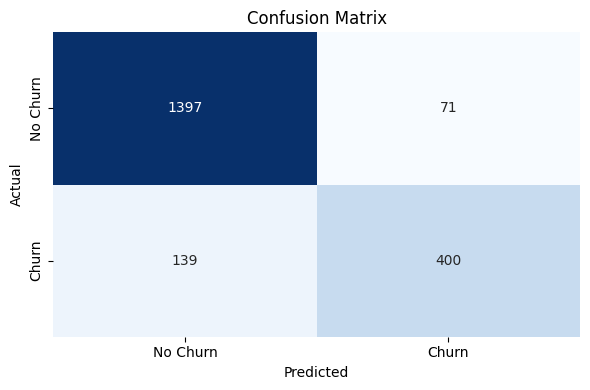

In [201]:
heatmap_vis(tuned_conf_matrix)

In [202]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 1, 10],
    'min_samples_split': [2, 5, 6],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest and GridSearch
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(x_train_v2_scaled, y_train_v2_scaled)

# Best model evaluation
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(x_test_v2_scaled)

rf_accuracy = accuracy_score(y_test_v2_scaled, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test_v2_scaled, y_pred_rf)
rf_report = classification_report(y_test_v2_scaled, y_pred_rf, output_dict=False)
rf_best_params = rf_grid.best_params_

print(f"Random Forest Accuracy: {rf_accuracy}")
print(rf_report)
print(rf_best_params)


Random Forest Accuracy: 0.8923766816143498
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1468
           1       0.83      0.75      0.79       539

    accuracy                           0.89      2007
   macro avg       0.87      0.85      0.86      2007
weighted avg       0.89      0.89      0.89      2007

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 400}


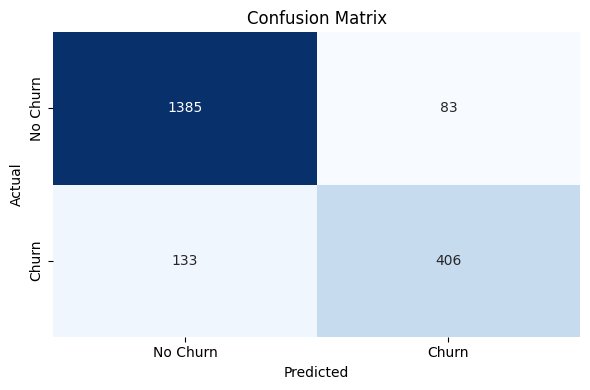

In [203]:
heatmap_vis(rf_conf_matrix)

In [204]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.5, 1],
    'subsample': [0.8, 1.0]
}

# Grid search for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(x_train_v2_scaled, y_train_v2_scaled)

# Evaluate best model
best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(x_test_v2_scaled)
xgb_cm = confusion_matrix(y_test_v2_scaled, y_pred)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v2_scaled, y_pred))
print("Classification Report:\n", classification_report(y_test_v2_scaled, y_pred))

C:\Users\Vijay\miniconda3\envs\ds\lib\site-packages\xgboost\core.py:158: UserWarning: [00:39:29] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Accuracy: 0.8978574987543597
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1468
           1       0.84      0.77      0.80       539

    accuracy                           0.90      2007
   macro avg       0.88      0.86      0.87      2007
weighted avg       0.90      0.90      0.90      2007



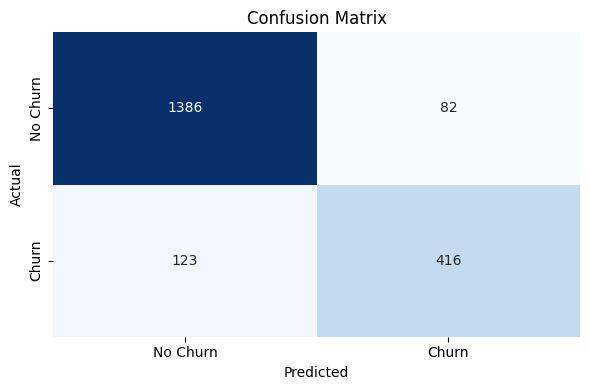

In [205]:
heatmap_vis(xgb_cm)

#### Unscaled Testing

In [206]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 50, 100],
    'solver': ['liblinear'],
}

logreg_tuned = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg_tuned, param_grid, cv=5, scoring='f1', n_jobs=-1, error_score='raise')

grid_search.fit(x_train_v2, y_train_v2)

best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(x_test_v2)

tuned_accuracy = accuracy_score(y_test_v2, y_pred_best)
tuned_conf_matrix = confusion_matrix(y_test_v2, y_pred_best)
tuned_report = classification_report(y_test_v2, y_pred_best, output_dict=False)
best_params = grid_search.best_params_

print(f"Tuned Model Accuracy: {tuned_accuracy}")
print(tuned_report)
print(best_params)

Tuned Model Accuracy: 0.8943697060288989
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1468
           1       0.85      0.74      0.79       539

    accuracy                           0.89      2007
   macro avg       0.88      0.85      0.86      2007
weighted avg       0.89      0.89      0.89      2007

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


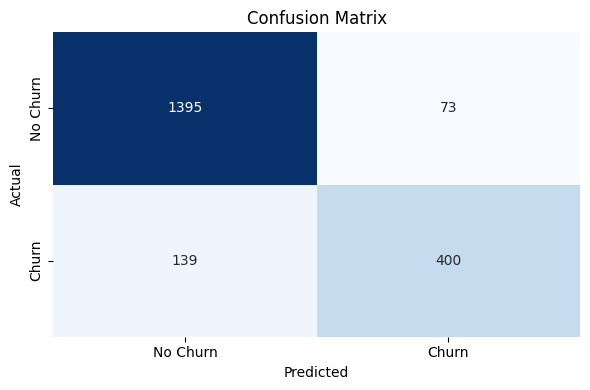

In [207]:
heatmap_vis(tuned_conf_matrix)

In [208]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 10],
    'min_samples_split': [5, 6, 9, 13],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest and GridSearch
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(x_train_v2, y_train_v2)

# Best model evaluation
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(x_test_v2)

rf_accuracy = accuracy_score(y_test_v2, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test_v2, y_pred_rf)
rf_report = classification_report(y_test_v2, y_pred_rf, output_dict=False)
rf_best_params = rf_grid.best_params_

print(f"Random Forest Accuracy: {rf_accuracy}")
print(rf_report)
print(rf_best_params)


Random Forest Accuracy: 0.8943697060288989
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1468
           1       0.84      0.76      0.79       539

    accuracy                           0.89      2007
   macro avg       0.87      0.85      0.86      2007
weighted avg       0.89      0.89      0.89      2007

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 200}


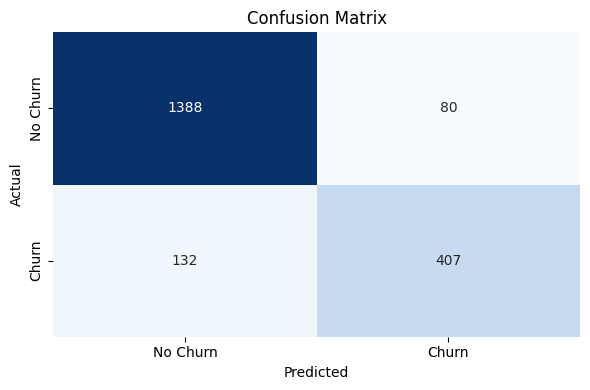

In [209]:
heatmap_vis(rf_conf_matrix)

In [210]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [1, 3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.5, 0.8],
    'subsample': [0.8, 1.0]
}

# Grid search for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(x_train_v2, y_train_v2)

# Evaluate best model
best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(x_test_v2)
xgb_cm = confusion_matrix(y_test_v2, y_pred)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v2, y_pred))
print("Classification Report:\n", classification_report(y_test_v2, y_pred))

C:\Users\Vijay\miniconda3\envs\ds\lib\site-packages\xgboost\core.py:158: UserWarning: [00:40:58] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.8993522670652716
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1468
           1       0.85      0.76      0.80       539

    accuracy                           0.90      2007
   macro avg       0.88      0.86      0.87      2007
weighted avg       0.90      0.90      0.90      2007



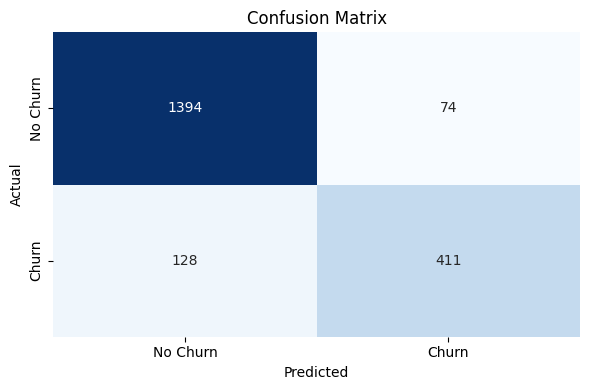

In [211]:
heatmap_vis(xgb_cm)

In [212]:
data_v3['Engagement Score'] = (data_v3['Local Mins'] + data_v3['Local Calls']) / (data_v3['Account Length (in months)'] + 1)
data_v3['Cost Efficiency'] = data_v3['Monthly Charge'] / (data_v3['Local Mins'] + 1)
data_v3['Support Intensity'] = data_v3['Customer Service Calls'] / (data_v3['Account Length (in months)'] + 1)
data_v3['Billing Pain'] = data_v3['Monthly Charge'] / (data_v3['Total Charges'] + 1)
data_v3['Usage-to-Cost'] = (data_v3['Local Mins'] + data_v3['Local Calls']) / (data_v3['Monthly Charge'] + 1)

In [213]:
data_v3.head()

,Account Length (in months),Local Mins,Local Calls,Total Charges,Monthly Charge,Customer Service Calls,Contract Type,Group,Number of Customers in Group,Payment Method,Unlimited Data Plan,Intl Active,Senior,Churn Label,Engagement Score,Cost Efficiency,Support Intensity,Billing Pain,Usage-to-Cost
0,1,8.0,3,10,10,0,Month-to-Month,No,0,Direct Debit,Yes,No,No,0,5.500000,1.111111,0.0,0.909091,1.000000
1,33,431.3,179,703,21,0,One Year,No,0,Paper Check,Yes,No,No,0,17.950000,0.048577,0.0,0.029830,27.740909
2,44,217.6,82,1014,23,0,One Year,No,0,Direct Debit,Yes,No,No,0,6.657778,0.105215,0.0,0.022660,12.483333
3,10,111.6,47,177,17,0,Month-to-Month,No,0,Paper Check,Yes,Yes,No,0,14.418182,0.150977,0.0,0.095506,8.811111
4,62,621.2,184,1720,28,0,One Year,No,0,Direct Debit,Yes,Yes,No,0,12.780952,0.045002,0.0,0.016270,27.765517


In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [215]:
vif_features_v3 = data_v3.select_dtypes(include="number")
vif_features_clean = vif_features_v3.replace([np.inf, -np.inf], np.nan).dropna()
X = add_constant(vif_features_clean)

vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df.sort_values(by="VIF", ascending=False)

,Feature,VIF
0,const,43.993669
2,Local Mins,21.184889
1,Account Length (in months),16.307668
4,Total Charges,13.995186
3,Local Calls,13.920480
5,Monthly Charge,5.174940
9,Engagement Score,4.981095
13,Usage-to-Cost,4.732714
12,Billing Pain,4.491711
10,Cost Efficiency,4.334140


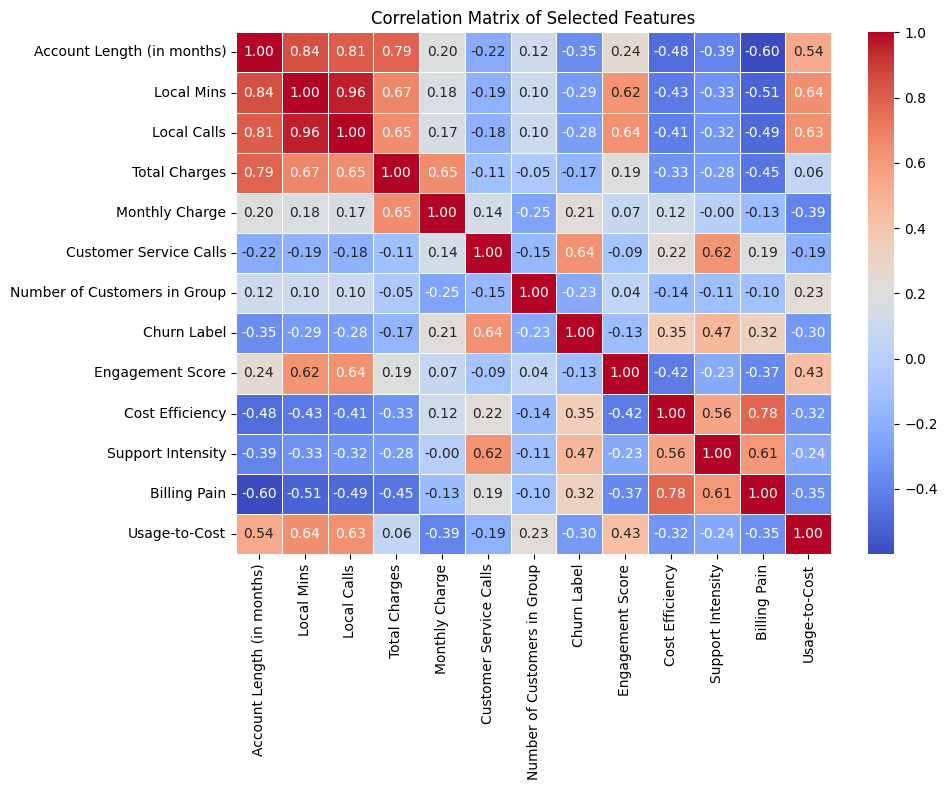

In [216]:
corr_mat_v3 = vif_features_v3.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat_v3, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

---

- Features flagged by VIF as collinear: Local Mins, Account Length, Local Calls, Total Charges.
- Features flagged by correlation matrix: Local Mins, Local Calls, Engagement Score, Total Charges, Account Length, Billing Pain, Monthly Pain

**To eliminate collinearity the following features will be removed: Local Mins, Local Calls, Total Charges, Account Length.**

---

In [217]:
data_v3 = data_v3.drop(columns=['Local Mins', 'Local Calls', 'Total Charges', 'Account Length (in months)'])

In [218]:
data_v3.head()

,Monthly Charge,Customer Service Calls,Contract Type,Group,Number of Customers in Group,Payment Method,Unlimited Data Plan,Intl Active,Senior,Churn Label,Engagement Score,Cost Efficiency,Support Intensity,Billing Pain,Usage-to-Cost
0,10,0,Month-to-Month,No,0,Direct Debit,Yes,No,No,0,5.500000,1.111111,0.0,0.909091,1.000000
1,21,0,One Year,No,0,Paper Check,Yes,No,No,0,17.950000,0.048577,0.0,0.029830,27.740909
2,23,0,One Year,No,0,Direct Debit,Yes,No,No,0,6.657778,0.105215,0.0,0.022660,12.483333
3,17,0,Month-to-Month,No,0,Paper Check,Yes,Yes,No,0,14.418182,0.150977,0.0,0.095506,8.811111
4,28,0,One Year,No,0,Direct Debit,Yes,Yes,No,0,12.780952,0.045002,0.0,0.016270,27.765517


In [219]:
y_v3 = data_v3['Churn Label']
x_v3 = data_v3.drop(columns=['Churn Label'])

x_v3_enc = pd.get_dummies(x_v3, drop_first=False, dtype=int)
x_v3_enc.head()

,Monthly Charge,Customer Service Calls,Number of Customers in Group,Engagement Score,Cost Efficiency,Support Intensity,Billing Pain,Usage-to-Cost,Contract Type_Month-to-Month,Contract Type_One Year,...,Group_Yes,Payment Method_Credit Card,Payment Method_Direct Debit,Payment Method_Paper Check,Unlimited Data Plan_No,Unlimited Data Plan_Yes,Intl Active_No,Intl Active_Yes,Senior_No,Senior_Yes
0,10,0,0,5.500000,1.111111,0.0,0.909091,1.000000,1,0,...,0,0,1,0,0,1,1,0,1,0
1,21,0,0,17.950000,0.048577,0.0,0.029830,27.740909,0,1,...,0,0,0,1,0,1,1,0,1,0
2,23,0,0,6.657778,0.105215,0.0,0.022660,12.483333,0,1,...,0,0,1,0,0,1,1,0,1,0
3,17,0,0,14.418182,0.150977,0.0,0.095506,8.811111,1,0,...,0,0,0,1,0,1,0,1,1,0
4,28,0,0,12.780952,0.045002,0.0,0.016270,27.765517,0,1,...,0,0,1,0,0,1,0,1,1,0


In [220]:
x_train_v3, x_test_v3, y_train_v3, y_test_v3 = train_test_split(x_v3_enc, y_v3, test_size=0.3, stratify=y_v3, random_state=42)

x_train_v3.shape, y_train_v3.shape, x_test_v3.shape, y_test_v3.shape

((4680, 22), (4680,), (2007, 22), (2007,))

In [221]:
v3_num_cols = x_v3.select_dtypes(include='number').columns.tolist()

scaler = StandardScaler()
x_v3_scaled = x_v3_enc.copy()
x_v3_scaled[v3_num_cols] = scaler.fit_transform(x_v3_scaled[v3_num_cols])

x_train_v3_scaled, x_test_v3_scaled, y_train_v3_scaled, y_test_v3_scaled = train_test_split(x_v3_scaled, y_v3, test_size=0.3, stratify=y_v3, random_state=42)


In [222]:
# Grid for Logistic Regression
logreg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 50, 100],
    'solver': ['liblinear']
}

# GridSearchCV
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg_grid = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='f1', n_jobs=-1)
logreg_grid.fit(x_train_v3, y_train_v3)

# Evaluate
best_logreg_v3 = logreg_grid.best_estimator_
y_pred_logreg = best_logreg_v3.predict(x_test_v3)

print("LogReg Best Params:", logreg_grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v3, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_v3, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test_v3, y_pred_logreg))


LogReg Best Params: {'C': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8993522670652716
Confusion Matrix:
 [[1393   75]
 [ 127  412]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1468
           1       0.85      0.76      0.80       539

    accuracy                           0.90      2007
   macro avg       0.88      0.86      0.87      2007
weighted avg       0.90      0.90      0.90      2007



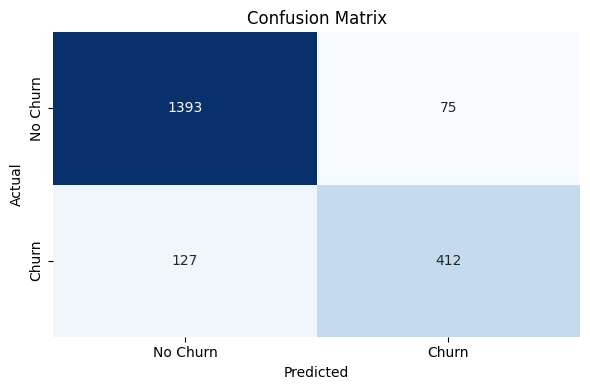

In [223]:
heatmap_vis(confusion_matrix(y_test_v3, y_pred_logreg))

In [224]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 6, 9],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(x_train_v3, y_train_v3)

best_rf_v3 = rf_grid.best_estimator_
y_pred_rf = best_rf_v3.predict(x_test_v3)

print("RF Best Params:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v3, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_v3, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_v3, y_pred_rf))


RF Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 200}
Accuracy: 0.8938714499252616
Confusion Matrix:
 [[1385   83]
 [ 130  409]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1468
           1       0.83      0.76      0.79       539

    accuracy                           0.89      2007
   macro avg       0.87      0.85      0.86      2007
weighted avg       0.89      0.89      0.89      2007



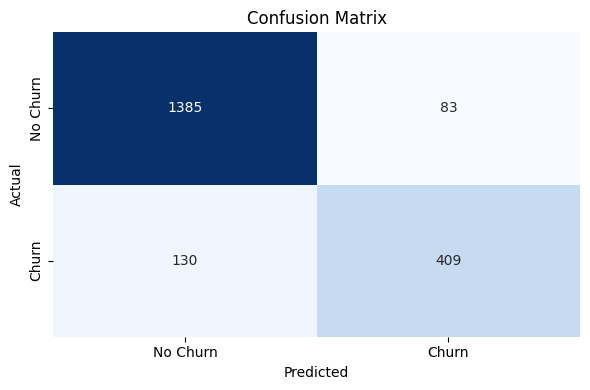

In [225]:
heatmap_vis(confusion_matrix(y_test_v3, y_pred_rf))

In [226]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='f1', n_jobs=-1)
xgb_grid.fit(x_train_v3, y_train_v3)

best_xgb_v3 = xgb_grid.best_estimator_
y_pred_xgb = best_xgb_v3.predict(x_test_v3)

print("XGB Best Params:", xgb_grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v3, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_v3, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test_v3, y_pred_xgb))


XGB Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.8933731938216243
Confusion Matrix:
 [[1388   80]
 [ 134  405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1468
           1       0.84      0.75      0.79       539

    accuracy                           0.89      2007
   macro avg       0.87      0.85      0.86      2007
weighted avg       0.89      0.89      0.89      2007



C:\Users\Vijay\miniconda3\envs\ds\lib\site-packages\xgboost\core.py:158: UserWarning: [00:44:18] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


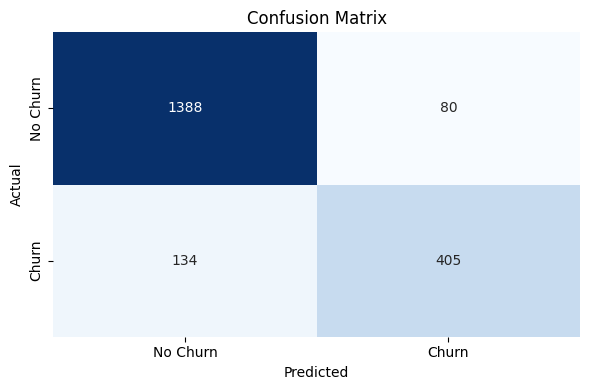

In [227]:
heatmap_vis(confusion_matrix(y_test_v3, y_pred_xgb))

In [228]:

# Grid for Logistic Regression
logreg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 50, 100],
    'solver': ['liblinear']
}

# GridSearchCV
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg_grid = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='f1', n_jobs=-1)
logreg_grid.fit(x_train_v3_scaled, y_train_v3_scaled)

# Evaluate
best_logreg_v3 = logreg_grid.best_estimator_
y_pred_logreg = best_logreg_v3.predict(x_test_v3_scaled)

print("LogReg Best Params:", logreg_grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v3_scaled, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_v3_scaled, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test_v3_scaled, y_pred_logreg))


LogReg Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8993522670652716
Confusion Matrix:
 [[1393   75]
 [ 127  412]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1468
           1       0.85      0.76      0.80       539

    accuracy                           0.90      2007
   macro avg       0.88      0.86      0.87      2007
weighted avg       0.90      0.90      0.90      2007



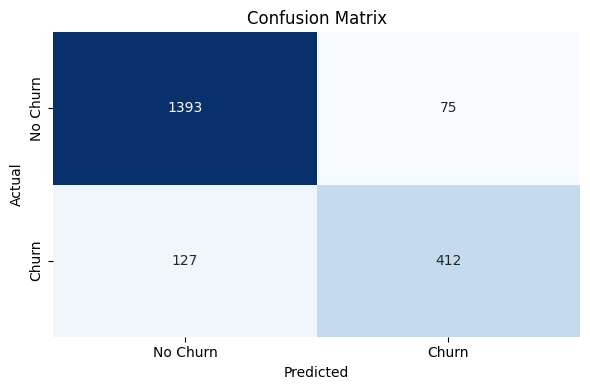

In [229]:
heatmap_vis(confusion_matrix(y_test_v3_scaled, y_pred_logreg))

In [230]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 6, 9],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(x_train_v3_scaled, y_train_v3_scaled)

best_rf_v3 = rf_grid.best_estimator_
y_pred_rf = best_rf_v3.predict(x_test_v3_scaled)

print("RF Best Params:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v3_scaled, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_v3_scaled, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_v3_scaled, y_pred_rf))


RF Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 200}
Accuracy: 0.8938714499252616
Confusion Matrix:
 [[1385   83]
 [ 130  409]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1468
           1       0.83      0.76      0.79       539

    accuracy                           0.89      2007
   macro avg       0.87      0.85      0.86      2007
weighted avg       0.89      0.89      0.89      2007



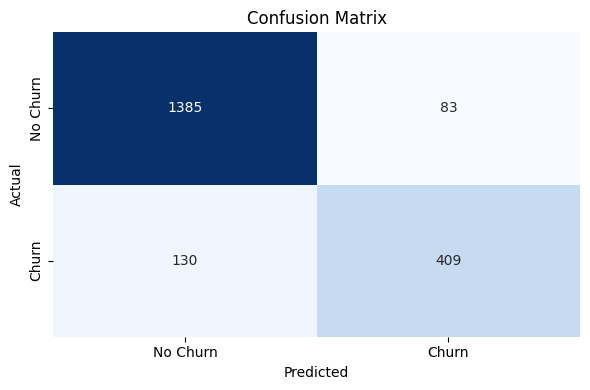

In [231]:
heatmap_vis(confusion_matrix(y_test_v3_scaled, y_pred_rf))

In [232]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='f1', n_jobs=-1)
xgb_grid.fit(x_train_v3_scaled, y_train_v3_scaled)

best_xgb_v3 = xgb_grid.best_estimator_
y_pred_xgb = best_xgb_v3.predict(x_test_v3_scaled)

print("XGB Best Params:", xgb_grid.best_params_)
print("Accuracy:", accuracy_score(y_test_v3_scaled, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_v3_scaled, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test_v3_scaled, y_pred_xgb))


XGB Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.8933731938216243
Confusion Matrix:
 [[1388   80]
 [ 134  405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1468
           1       0.84      0.75      0.79       539

    accuracy                           0.89      2007
   macro avg       0.87      0.85      0.86      2007
weighted avg       0.89      0.89      0.89      2007



C:\Users\Vijay\miniconda3\envs\ds\lib\site-packages\xgboost\core.py:158: UserWarning: [00:46:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


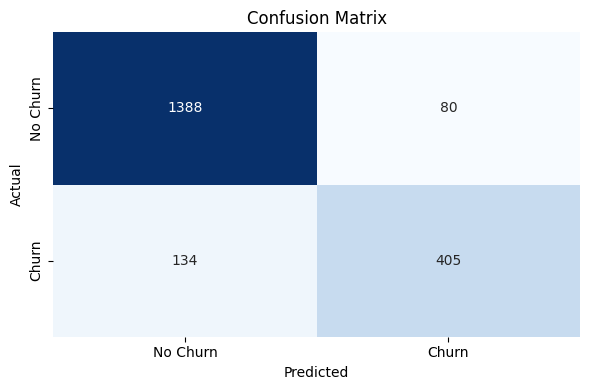

In [233]:
heatmap_vis(confusion_matrix(y_test_v3_scaled, y_pred_xgb))

In [234]:
data_v1.head()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,0,1,3,8.0,0.0,0.0,No,no,0.0,0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,Not Churned,Not Churned
1,0,33,179,431.3,0.0,0.0,No,no,0.0,0,...,No,No,0,Yes,One Year,Paper Check,21,703,Not Churned,Not Churned
2,0,44,82,217.6,0.0,0.0,No,yes,0.0,0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,Not Churned,Not Churned
3,0,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,Not Churned,Not Churned
4,0,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,...,No,No,0,No,One Year,Direct Debit,28,1720,Not Churned,Not Churned


In [235]:
data_v1['Total Charges'].mean()

1083.7556452818903

In [236]:
data_v1['Total Charges'].median()

647.0

In [ ]:

- Account Length: Longer tenure reduces churn
- Local Mins: Higher usage indicates engagement which reduces churn
- Local Calls: Higher usage indicates engagement which reduces churn
- Total Charges: Measurement for lifetime value.
- Monthly Charges: Higher values linked to higher churn
- Customer Service Calls: Most predictive churn driver


**Categorical Features**
- Contract Type: A strong churn predictor highlighting that month-to-month users strongly increase churn
- Group: Group Members are more loyal
- Number of Customers in a Group: Quantifies group effect
- Payment Method: Paper & Direct Debit users churn more
- Unlimited Data Plan: Users with the plan churn more
- International Active: Active international users churn more
- Senior: are slightly more prone to churn